In [214]:
%run ./"0 Imports and functions.ipynb"
#
# Load cube information and result files
#
#
#

# Take the line information:
#File_Descriptor_a="NGC_253_HCN_J1-0_" 

#FD_a,FD_b,FD_c = "NGC_253_HCN_J1-0_","NGC_253_HCO+_J1-0_","NGC_253_CO_J3-2_"

#FD_d,FD_e,FD_f = "cmz_HCN_J1-0_","cmz_HCO+_J1-0_","cmz_CO_J3_2_"
#FD_d,FD_e,FD_f = "cmz_HCN_J1-0_","cmz_HCO+_J1-0_",'cmz_CO_J3_2_INSANE'

File_Descriptors_NGC = [
    "NGC_253_H13CN_J1-0_",
    "NGC_253_HCN_J1-0_",
    "NGC_253_H13CO+_J1-0_",
    "NGC_253_HCO+_J1-0_",
    "NGC_253_CO_J3-2_",
    "NGC_253_CO_J1-0_",
    "NGC_253_SiO_J2-1_",
    "NGC_253_H13CN_J4-3_",
    "NGC_253_HCN_J4-3_",
    "NGC_253_HCO+_J4-3_"
]

File_Descriptors_cmz = [
    "cmz_H13CN_J1_0_",
    "cmz_HCN_J1-0_",
    "cmz_H13COp_J1_0_",
    "cmz_3mm_HCO+_J1-0_",
    "cmz_CO_J3_2__",
    "cmz_CO_J1_0_",
    "cmz_SiO_J2_1_",
    "NOT AVAILABLE",
    "cmz_HCN_J4_3_",
    "NOT AVAILABLE"
]



for i in range(len(File_Descriptors_cmz)):
    #File_Descriptors_cmz[i]+="Low_Delta_"
    pass
for i in range(len(File_Descriptors_NGC)):
    #File_Descriptors_NGC[i]+="Low_Delta_"
    pass
print( File_Descriptors_NGC)

print( File_Descriptors_cmz)
#File_Descriptors_NGC = [FD_a,FD_b,FD_c] # 
#File_Descriptors_NGC = [FD_a,FD_c] # 
#File_Descriptors_cmz = [FD_d,FD_f]

##################################
##################################
#Load cube info and result files
##################################

import pickle 


Cube_Information_NGC = []
Pointing_Information_NGC = []
Results_NGC=[]
# The fits, each fit has the [popt,pcov], (the fit and covariance matrix)
Fit_Results_NGC=[] #Fits: [Size_Linewidth_Leaves,Size_Linewidth_Branches,Size_Linewidth_All],[Radius_Luminosity_All],[CD_SL-Ratio]
i=0
for fd in File_Descriptors_NGC:
    try:
        print(i)
        with open("Spectral Cubes/Cube Information/"+fd+"_Cube_Information", 'rb') as file:

            Cube_Information_NGC.append( pickle.load(file))

        with open("Spectral Cubes/Cube Information/"+fd+"_Pointing_Information", 'rb') as file:

            Pointing_Information_NGC.append( pickle.load(file))

        File_Name = Cube_Information_NGC[i]['File_Name']
        #if(i==1):
        #File_Name = "Cropped_4.3pc_beam_NGC_253_HCN_J1-0_72.0x360.0pc_reprojected_3.4_vel_res_.fits"

        with open("Result Files/"+fd+File_Name[0:len(File_Name)-5]+"_Results", 'rb') as file:

            Results_NGC.append( pickle.load(file))

        with open("Result Files/"+fd+File_Name[0:len(File_Name)-5]+"_Fit_Results", 'rb') as file:

            Fit_Results_NGC.append( pickle.load(file))
        print("Result Files/"+fd+File_Name[0:len(File_Name)-5]+"_Results")

        print(fd,"LOADED")
        i+=1

    except:
        print("Result Files/"+fd+File_Name[0:len(File_Name)-5]+"_Results")

        Fit_Results_NGC.append(Fit_Results_NGC[0])
        print(fd,"FAILED")
        i+=1


        
Cube_Information_CMZ = []
Pointing_Information_CMZ = []
Results_CMZ=[] #Statistics: Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances,r_err
# The fits, each fit has the [popt,pcov], (the fit and covariance matrix)
Fit_Results_CMZ=[] #Fits: [Size_Linewidth_Leaves,Size_Linewidth_Branches,Size_Linewidth_All],[Radius_Luminosity_All],[CD_SL-Ratio] all for LS fits
i=0
for fd in File_Descriptors_cmz:
    try:
        print(i)
        if fd == "NOT AVAILABLE":
            File_Name = File_Descriptors_NGC[i] + "Is not available in the CMZ"
 


        with open("Spectral Cubes/Cube Information/"+fd+"_Cube_Information", 'rb') as file:

            Cube_Information_CMZ.append( pickle.load(file))

        with open("Spectral Cubes/Cube Information/"+fd+"_Pointing_Information", 'rb') as file:

            Pointing_Information_CMZ.append( pickle.load(file))

        File_Name = Cube_Information_CMZ[i]['File_Name']
        with open("Result Files/"+fd+File_Name[0:len(File_Name)-5]+"_Results", 'rb') as file:
            
            Results_CMZ.append( pickle.load(file))
        with open("Result Files/"+fd+File_Name[0:len(File_Name)-5]+"_Fit_Results", 'rb') as file:

            Fit_Results_CMZ.append( pickle.load(file))

        i+=1
        print("Result Files/"+fd+File_Name[0:len(File_Name)-5]+"_Results")

        print(fd,"LOADED")
    except:
        Fit_Results_CMZ.append(copy.deepcopy(Fit_Results_CMZ[0]))
        Cube_Information_CMZ.append(Pointing_Information_CMZ[0])
        Pointing_Information_CMZ.append( Pointing_Information_CMZ[0])
        Results_CMZ.append( Results_CMZ[0])



        print("Result Files/"+fd+File_Name[0:len(File_Name)-5]+"_Results")

        print(fd,"FAILED")
        i+=1




#%matplotlib widget 
#%matplotlib notebook


/home/ben/miniconda3/bin/python
3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)
astropy 5.1.dev153+gb740594dc
spectral_cube 0.6.1.dev22+g003ef16
spectral_cube file path /home/ben/.local/lib/python3.8/site-packages/spectral_cube/__init__.py
reproject 0.8
3.3.4 Matplotlib
/home/ben/miniconda3/lib/python3.8/site-packages/matplotlib/__init__.py
1.23.1 Numpy
astrodendro_file: /home/ben/.local/lib/python3.8/site-packages/astrodendro/__init__.py
Results will be saved to Directory ./Result Files
Cubes will be saved and loaded with Directory ./Spectral Cubes
Plots will be saved to Directory ./Plots
Dendrograms will be saved to Directory ./Dendrograms
['NGC_253_H13CN_J1-0_', 'NGC_253_HCN_J1-0_', 'NGC_253_H13CO+_J1-0_', 'NGC_253_HCO+_J1-0_', 'NGC_253_CO_J3-2_', 'NGC_253_CO_J1-0_', 'NGC_253_SiO_J2-1_', 'NGC_253_H13CN_J4-3_', 'NGC_253_HCN_J4-3_', 'NGC_253_HCO+_J4-3_']
['cmz_H13CN_J1_0_', 'cmz_HCN_J1-0_', 'cmz_H13COp_J1_

In [11]:
# Count structures:
num_CMZ=0
num_NGC=0
i=0
for r in Results_CMZ:
    print(File_Descriptors_cmz[i],"leaves, branches: ",len(r[0][0]),len(r[0][1]))
    i+=1
    num_CMZ+=len(r[0][0])+len(r[0][1])
i=0
for r in Results_NGC:
    print(File_Descriptors_NGC[i],"leaves, branches: ",len(r[0][0]),len(r[0][1]))
    i+=1
    num_NGC+=len(r[0][0])+len(r[0][1])
    
print("Total structures, CMZ, NGC:", num_CMZ,num_NGC)


cmz_H13CN_J1_0_Low_Delta_ leaves, branches:  127 37
cmz_HCN_J1-0_Low_Delta_ leaves, branches:  228 67
cmz_H13COp_J1_0_Low_Delta_ leaves, branches:  69 33
cmz_3mm_HCO+_J1-0_Low_Delta_ leaves, branches:  92 43
cmz_CO_J3_2__Low_Delta_ leaves, branches:  3387 1161
cmz_CO_J1_0_Low_Delta_ leaves, branches:  220 73
cmz_SiO_J2_1_Low_Delta_ leaves, branches:  60 22
NOT AVAILABLELow_Delta_ leaves, branches:  127 37
cmz_HCN_J4_3_Low_Delta_ leaves, branches:  255 114
NOT AVAILABLELow_Delta_ leaves, branches:  127 37
NGC_253_H13CN_J1-0_Low_Delta_ leaves, branches:  56 57
NGC_253_HCN_J1-0_Low_Delta_ leaves, branches:  182 84
NGC_253_H13CO+_J1-0_Low_Delta_ leaves, branches:  37 34
NGC_253_HCO+_J1-0_Low_Delta_ leaves, branches:  139 66
NGC_253_CO_J3-2_Low_Delta_ leaves, branches:  2193 554
NGC_253_CO_J1-0_Low_Delta_ leaves, branches:  412 157
NGC_253_SiO_J2-1_Low_Delta_ leaves, branches:  26 22
NGC_253_H13CN_J4-3_Low_Delta_ leaves, branches:  86 11
NGC_253_HCN_J4-3_Low_Delta_ leaves, branches:  145 68

In [213]:
# Count structures:
num_CMZ=0
num_NGC=0
leavecmz=0
leavengc=0
i=0
for r in Results_CMZ:
    print(File_Descriptors_cmz[i],"leaves, branches: ",len(r[0][0]),len(r[0][1]))
    i+=1
    num_CMZ+=len(r[0][0])+len(r[0][1])
    leavecmz+=len(r[0][0])
i=0
for r in Results_NGC:
    print(File_Descriptors_NGC[i],"leaves, branches: ",len(r[0][0]),len(r[0][1]))
    i+=1
    num_NGC+=len(r[0][0])+len(r[0][1])
    leavengc+=len(r[0][0])
    
print("Total structures, CMZ, NGC:", num_CMZ,num_NGC)
print("Leaves, CMZ, NGC:", leavecmz,leavengc)


cmz_H13CN_J1_0_ leaves, branches:  42 16
cmz_HCN_J1-0_ leaves, branches:  104 31
cmz_H13COp_J1_0_ leaves, branches:  19 9
cmz_3mm_HCO+_J1-0_ leaves, branches:  31 13
cmz_CO_J3_2__ leaves, branches:  924 325
cmz_CO_J1_0_ leaves, branches:  173 65
cmz_SiO_J2_1_ leaves, branches:  23 5
NOT AVAILABLE leaves, branches:  42 16
cmz_HCN_J4_3_ leaves, branches:  129 70
NOT AVAILABLE leaves, branches:  42 16
NGC_253_H13CN_J1-0_ leaves, branches:  11 4
NGC_253_HCN_J1-0_ leaves, branches:  29 20
NGC_253_H13CO+_J1-0_ leaves, branches:  12 8
NGC_253_HCO+_J1-0_ leaves, branches:  34 21
NGC_253_CO_J3-2_ leaves, branches:  478 119
NGC_253_CO_J1-0_ leaves, branches:  133 79
NGC_253_SiO_J2-1_ leaves, branches:  9 4
NGC_253_H13CN_J4-3_ leaves, branches:  16 2
NGC_253_HCN_J4-3_ leaves, branches:  28 16
NGC_253_HCO+_J4-3_ leaves, branches:  27 16
Total structures, CMZ, NGC: 2095 1066
Leaves, CMZ, NGC: 1529 777


# Function for creating plot of leaves/branches/all

In [215]:


#make a meta function for doing the plots of leaves and branches and stuff
def make_plots(CMZ_Names,NGC_Names,MCMC,use_manual_error_v_=[False,[0]],use_manual_error_r_=[False,[0]],min_rs=[0],max_rs=[0],which="All",save_name="",fs=10,plot_2=True,plot_errors=False,ls=12,figsize=(8,8)):

    CMZ_names = CMZ_Names
    NGC_names = NGC_Names
    MCMC=MCMC
    if MCMC:
        ls= False
    else:
        ls=True
    use_manual_error_v=use_manual_error_v_[0]
    use_manual_error_r=use_manual_error_r_[0]
    min_rs = min_rs
    max_rs = max_rs
    r_errs=use_manual_error_r_[1]
    v_errs=use_manual_error_v_[1]



    #Err propagation function for Sigma = A*r^b
    #
    def propagate(r,A,b,A_err,b_err):
        ds_over_db = A*r**b*np.log(r)
        ds_over_dA = r**b
        err_prop = np.sqrt((ds_over_dA*A_err)**2 + (ds_over_db*b_err)**2)
        return err_prop #returns the propagated error at the point r

    print(File_Descriptors_NGC,File_Descriptors_cmz)
    for i in range(len(File_Descriptors_NGC)):
        scatter_alpha = 1 #the alpha of points on the graph

        #print(File_Descriptors_NGC[i],File_Descriptors_cmz[i])
        er_r=3 # the amount of error to show
        ############################################################        
        #
        #
        #Get shared info:        

        Prime_Beam = Cube_Information_NGC[i]["desired_beam_size"]
        vel_prime = Cube_Information_NGC[i]["desired_velocity_resolution"]
        ovs = Cube_Information_NGC[i]["desired_beam_oversampling"]
        #Check teh resolutions
        if(Prime_Beam != Cube_Information_CMZ[i]["desired_beam_size"] or  vel_prime != Cube_Information_CMZ[i]["desired_velocity_resolution"]):
            print("The beam or veloctiy resolution for NGC253 and the CMZ are not properly matched:")
            print(Prime_Beam, Cube_Information_CMZ[i]["desired_beam_size"])
            print(vel_prime, Cube_Information_CMZ[i]["desired_velocity_resolution"])
            print(File_Descriptors_NGC[i],File_Descriptors_cmz[i])
            #break

        ###########################################################################
        #
        #
        #
        #make figure




        # make lines showing the minimum resolutions for the structures
        min_space=np.array([[np.full(100,Prime_Beam/ovs)],[np.linspace(-100,1000,100)]])
        Beams_s=np.array([[np.full(100,Prime_Beam)],[np.linspace(-100,1000,100)]])
        spec=np.array([[np.linspace(-100,1000,100)],[np.full(100,vel_prime)]])
        zeroes=np.array([[np.full(100,0)]])



        ##########################################################################################
        #
        # CMZ data
        #
        #
        try:
            Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances = Results_CMZ[i]
        except:
            Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances,r_err = Results_CMZ[i]

        Size_Linewidth_Leaves,Size_Linewidth_Branches,Size_Linewidth_All = Fit_Results_CMZ[i][0]
        Radius_Luminosity_All,CD_SL_Ratio = Fit_Results_CMZ[i][1],Fit_Results_CMZ[i][2]

        


        #print("Size in ", Size[0][0].unit,"Sigma in",RMS_Velocity[0][0].unit,"Luminosity in",Luminosity[0][0].unit,"CD in",CDs[0][0].unit,'Mom 0 in',MOM0_FLUX[0][0].unit )
        #Split the arrays, and strip the units so i can plot them:

        def strip_units(quantity_list):
            return [q.value for q in quantity_list]
        ###########################################################################
        # Convert each to unitless lists
        Size_Leaves, Size_Branches, Size_All = strip_units(Size[0]), strip_units(Size[1]), (np.concatenate((strip_units(Size[0]), strip_units(Size[1]))))
        ###########################################################################
        RMS_Velocity_Leaves, RMS_Velocity_Branches, RMS_Velocity_All = strip_units(RMS_Velocity[0]), strip_units(RMS_Velocity[1]), (np.concatenate((strip_units(RMS_Velocity[0]), strip_units(RMS_Velocity[1]))))
        ###########################################################################
        V_rms_err_Leaves, V_rms_err_Branches, V_rms_err_All = strip_units(V_rms_err[0]), strip_units(V_rms_err[1]), (np.concatenate((strip_units(V_rms_err[0]), strip_units(V_rms_err[1]))))
        ###########################################################################
        r_err_Leaves, r_err_Branches, r_err_All = strip_units(r_err[0]), strip_units(r_err[1]), (np.concatenate((strip_units(r_err[0]), strip_units(r_err[1]))))
        ###########################################################################
        ###########################################################################
        
            
        if which == "All":
            addon=""
            pass
        elif which == "Leaves":
            del Size_All #in a very poor way, just substitute the leaves for the "all" array, which is the one being analyzed
            del r_err_All
            del V_rms_err_All
            del RMS_Velocity_All
            addon="Leaves"
            Size_All =Size_Leaves
            r_err_All=r_err_Leaves
            V_rms_err_All=V_rms_err_Leaves
            RMS_Velocity_All=RMS_Velocity_Leaves
        elif which == "Branches":
            del Size_All #in a very poor way, just substitute the leaves for the "all" array, which is the one being analyzed
            del r_err_All
            del V_rms_err_All
            del RMS_Velocity_All
            addon="Branches"
            Size_All =Size_Branches
            r_err_All=r_err_Branches
            V_rms_err_All=V_rms_err_Branches
            RMS_Velocity_All=RMS_Velocity_Branches
            
        #set the scatterplot alpha based on the unmber on points
        if len(Size_All)>500:
            scatter_alpha=.5
        
            
        #The variables and the covariance matrix for the current fit:
        Vars,CoVar = Size_Linewidth_All[0],Size_Linewidth_All[1]
        #
        #
        #MCMC fit
        #
        for k in range(len(Size_All)):
            if Size_All[k]<min_rs[i]:
                Size_All[k]=np.nan
            if Size_All[k]>max_rs[i]:
                Size_All[k]=np.nan
        _,RMS_Velocity_All = crossmatch(Size_All,RMS_Velocity_All)
        _,r_err_All = crossmatch(Size_All,r_err_All)
        Size_All,V_rms_err_All = crossmatch(Size_All,V_rms_err_All)
        if MCMC:

            if use_manual_error_v:

                V_rms_err_All=copy.deepcopy(Size_All)
                for w in range(len(Size_All)):
                    V_rms_err_All[w]=v_errs[i]
                
            if use_manual_error_r:
                r_err_All=copy.deepcopy(Size_All)
                for w in range(len(Size_All)):
                    r_err_All[w] = r_errs[i]

           
        _,RMS_Velocity_All = crossmatch(Size_All,RMS_Velocity_All)
        _,r_err_All = crossmatch(Size_All,r_err_All)
        Size_All,V_rms_err_All = crossmatch(Size_All,V_rms_err_All)

        fit = make_MCMC_fit(M_1=(Size_All),M_2=(RMS_Velocity_All),M_1_err=(r_err_All*1),M_2_err=(V_rms_err_All*1),nsteps=5000, nwalkers=50,input_="linear",temp=.1, args={"Label":"LS","Label2":"MCMC", "SAVE_NAME":"tt.png","SOURCE":File_Descriptors_cmz[i]},plot_plot=False)
        if ls:
            print("Using Least Squares fit","min r =",min_rs[i])
            Vars,CoVar = [fit.c['ls'][0],fit.a['ls'][0]],[[fit.c['ls'][1],0],[0,fit.a['ls'][1]]]
        else:
            if use_manual_error_v:
                print("Using MCMC fit with assumed errors, r_err = ",r_errs[i]," v_err =",v_errs[i],"min r =",min_rs[i])
            else:
                print("Using MCMC fit with assumed errors, r_err = ",r_errs[i],"min r =",min_rs[i])
            Vars,CoVar = [fit.c['MCMC'][0],fit.a['MCMC'][0]],[[fit.c['MCMC'][1],0],[0,fit.a['MCMC'][1]]]


        #save fit results
        fit_results_cmz[0].append(Vars)
        fit_results_cmz[1].append(CoVar)
        #
        #
        #Assemble the scatter plot
        #


        Title = str(File_Descriptors_cmz[i] + " Compare to " + File_Descriptors_NGC[i] + " Size-Linewidth") + "  " +addon+save_name
        xticks = np.linspace(0,20,10,dtype = type(2))
        yticks = np.linspace(0,30,10,dtype = type(2))
        xlabels,ylabels = xticks,yticks
        #Use a function with all my presets in it:
        fig,ax = Setup_Comp_Plot(Title,axes=["",""],xlim=[0,20],ylim=[0,30],xticks=xticks,yticks=yticks,xlabels=xlabels,ylabels=ylabels,args={"lims":False,'ts':fs,'ls':ls},figsize=figsize)
        print()
        print(Title)
        print()
        ax.set_xscale('log')
        ax.set_yscale('log')

        #x axis:
        x = np.linspace(np.nanmin(Size_All),np.nanmax(Size_All),50) 
        
        ax.set_aspect('auto')


        min_r=.5
        if File_Descriptors_cmz[i].find("NOT AVAILABLE")==-1:
            stri = f"CMZ A = {np.round(Vars[0],2)} ± {np.round(np.sqrt(CoVar[0][0]),2)}  b = {np.round(Vars[1],2)} ± {np.round(np.sqrt(CoVar[1][1]),2)}"

            ax.annotate(stri,xy=(0.381,.071),xycoords="axes fraction") 

            print("CMZ fit params and covariance error:","a = ", Vars[0], " +- ",np.sqrt(CoVar[0][0]),", b = ", Vars[1], " +- ",np.sqrt(CoVar[1][1]))
            print()
            print("Structures plotted: ", len(Size_All))
            print()
            ax.plot(x,func(x,Vars[0],Vars[1]),color="blue",label="CMZ")
            ax.scatter(Size_All,RMS_Velocity_All,color="blue",alpha=scatter_alpha)
            if plot_errors:
                ax.errorbar(Size_All, RMS_Velocity_All, yerr=V_rms_err_All, fmt='o', capsize=5,color="blue",alpha=scatter_alpha)

            

            #def propagate(r,A,b,A_err,b_err):
            err_prop = propagate(x,Vars[0],Vars[1],np.sqrt(CoVar[0][0]),np.sqrt(CoVar[1][1]))*er_r #The propagated error for each point r = x, multiplied by 3 for 3 sigma
            #for estimated error:
            ax.fill_between(x,func(x,Vars[0]+np.sqrt(CoVar[0][0])*er_r,Vars[1]+np.sqrt(CoVar[1][1])*er_r),func(x,Vars[0]-np.sqrt(CoVar[0][0])*er_r,Vars[1]-np.sqrt(CoVar[1][1])*er_r),alpha=.2,color="blue")
            ax.set_xlabel(r'$R_{astrodendro}$ (pc)',fontsize=15)
            ax.set_ylabel(r'$\sigma   (km/s)$',fontsize=15)
            #set min r
            min_r = np.nanmin(Size_All)

        else:
            print(File_Descriptors_NGC[i],"is not available in the CMZ")
            

        #set minimum for the graph

        min_sigma = func(min(Size_All),Vars[0]-np.sqrt(CoVar[0][0])*er_r,Vars[1]-np.sqrt(CoVar[1][1])*er_r)
        if (np.nanmin(RMS_Velocity_All) < min_sigma):
            min_sigma = np.nanmin(RMS_Velocity_All)
        ##########################################################################################
        ##########################################################################################
        ##########################################################################################
        #
        # NGC data
        #
        #

        try:
            Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances = Results_NGC[i]
        except:
            Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances,r_err = Results_NGC[i]

        Size_Linewidth_Leaves,Size_Linewidth_Branches,Size_Linewidth_All = Fit_Results_NGC[i][0]
        Radius_Luminosity_All,CD_SL_Ratio = Fit_Results_NGC[i][1],Fit_Results_NGC[i][2]
        print("Size in ", Size[0][0].unit,"Sigma in",RMS_Velocity[0][0].unit,"Luminosity in",Luminosity[0][0].unit,"CD in",CDs[0][0].unit,'Mom 0 in',MOM0_FLUX[0][0].unit )
        #Split the arrays, and strip the units so i can plot them:

        ###########################################################################
        # Convert each to unitless lists
        Size_Leaves, Size_Branches, Size_All = strip_units(Size[0]), strip_units(Size[1]), (np.concatenate((strip_units(Size[0]), strip_units(Size[1]))))
        ###########################################################################
        RMS_Velocity_Leaves, RMS_Velocity_Branches, RMS_Velocity_All = strip_units(RMS_Velocity[0]), strip_units(RMS_Velocity[1]), (np.concatenate((strip_units(RMS_Velocity[0]), strip_units(RMS_Velocity[1]))))
        ###########################################################################
        V_rms_err_Leaves, V_rms_err_Branches, V_rms_err_All = strip_units(V_rms_err[0]), strip_units(V_rms_err[1]), (np.concatenate((strip_units(V_rms_err[0]), strip_units(V_rms_err[1]))))
        ###########################################################################
        r_err_Leaves, r_err_Branches, r_err_All = strip_units(r_err[0]), strip_units(r_err[1]), (np.concatenate((strip_units(r_err[0]), strip_units(r_err[1]))))
        ###########################################################################
        ###########################################################################

        if which == "All":
            addon=""
            pass
        elif which == "Leaves":
            del Size_All #in a very poor way, just substitute the leaves for the "all" array, which is the one being analyzed
            del r_err_All
            del V_rms_err_All
            del RMS_Velocity_All
            addon="Leaves"
            Size_All =Size_Leaves
            r_err_All=r_err_Leaves
            V_rms_err_All=V_rms_err_Leaves
            RMS_Velocity_All=RMS_Velocity_Leaves
        elif which == "Branches":
            del Size_All #in a very poor way, just substitute the leaves for the "all" array, which is the one being analyzed
            del r_err_All
            del V_rms_err_All
            del RMS_Velocity_All
            addon="Branches"
            Size_All =Size_Branches
            r_err_All=r_err_Branches
            V_rms_err_All=V_rms_err_Branches
            RMS_Velocity_All=RMS_Velocity_Branches
        #The variables and the covariance matrix for the current fit:
        Vars,CoVar = Size_Linewidth_All[0],Size_Linewidth_All[1]

        for k in range(len(Size_All)):
            if Size_All[k]<min_rs[i]:
                Size_All[k]=np.nan
            if Size_All[k]>max_rs[i]:
                Size_All[k]=np.nan
        _,RMS_Velocity_All = crossmatch(Size_All,RMS_Velocity_All)
        _,r_err_All = crossmatch(Size_All,r_err_All)
        Size_All,V_rms_err_All = crossmatch(Size_All,V_rms_err_All)
        #
        #
        #MCMC fit
        #
        
        if MCMC:
            if use_manual_error_v:

                V_rms_err_All=copy.deepcopy(Size_All)
                for w in range(len(Size_All)):
                    V_rms_err_All[w]=v_errs[i]
            if use_manual_error_r:
                r_err_All=copy.deepcopy(Size_All)
                for w in range(len(Size_All)):
                    r_err_All[w] = r_errs[i]


        _,RMS_Velocity_All = crossmatch(Size_All,RMS_Velocity_All)
        _,r_err_All = crossmatch(Size_All,r_err_All)
        Size_All,V_rms_err_All = crossmatch(Size_All,V_rms_err_All)


        fit = make_MCMC_fit(M_1=(Size_All),M_2=(RMS_Velocity_All),M_1_err=(r_err_All*1),M_2_err=(V_rms_err_All*1),nsteps=5000, nwalkers=50,input_="linear",temp=.1, args={"Label":"LS","Label2":"MCMC", "SAVE_NAME":"tt.png","SOURCE":File_Descriptors_NGC[i]},plot_plot=False)

        if ls:
            Vars,CoVar = [fit.c['ls'][0],fit.a['ls'][0]],[[fit.c['ls'][1],0],[0,fit.a['ls'][1]]]
        else:
            Vars,CoVar = [fit.c['MCMC'][0],fit.a['MCMC'][0]],[[fit.c['MCMC'][1],0],[0,fit.a['MCMC'][1]]]


        if plot_2:
            ax.annotate("V_rms = A*x^b",xy=(0.451,.101),xycoords="axes fraction")
            stri = f"NGC253 A = {np.round(Vars[0],2)} ± {np.round(np.sqrt(CoVar[0][0]),2)}  b = {np.round(Vars[1],2)} ± {np.round(np.sqrt(CoVar[1][1]),2)}"
            ax.annotate(stri, xy=(0.381, .041), xycoords="axes fraction")

            #
            #
            #Assemble the scatter plot
            #

            #x axis:
            x = np.linspace(np.nanmin(Size_All),np.nanmax(Size_All),50) 






            print("NGC253 fit params and covariance error:","a = ", Vars[0], " +- ",np.sqrt(CoVar[0][0]),", b = ", Vars[1], " +- ",np.sqrt(CoVar[1][1]))
            print()
            print("Structures plotted: ", len(Size_All))
            print()
            ax.plot(x,func(x,Vars[0],Vars[1]),color="red",label="NGC253")
            ax.scatter(Size_All,RMS_Velocity_All,color="red",alpha=scatter_alpha)
            if plot_errors:
                ax.errorbar(Size_All, RMS_Velocity_All, yerr=V_rms_err_All, fmt='o', capsize=5,color="red",alpha=scatter_alpha)
        #save fit results
        fit_results_ngc[0].append(Vars)
        fit_results_ngc[1].append(CoVar)
        #def propagate(r,A,b,A_err,b_err):
        err_prop = propagate(x,Vars[0],Vars[1],np.sqrt(CoVar[0][0]),np.sqrt(CoVar[1][1]))*er_r #The propagated error for each point r = x, multiplied by 3 for 3 sigma
        #print(err_prop,"err")
        #print(func(x,Vars[0]+np.sqrt(CoVar[0][0])*er_r,Vars[1]+np.sqrt(CoVar[1][1])*er_r)-func(x,Vars[0],Vars[1]))
        #ax.fill_between(x,(func(x,Vars[0],Vars[1])+err_prop),(func(x,Vars[0],Vars[1])-err_prop),alpha=.6,color="red")
        #for estimated error:
        ax.fill_between(x,func(x,Vars[0]+np.sqrt(CoVar[0][0])*er_r,Vars[1]+np.sqrt(CoVar[1][1])*er_r),func(x,Vars[0]-np.sqrt(CoVar[0][0])*er_r,Vars[1]-np.sqrt(CoVar[1][1])*er_r),alpha=.2,color="red")
        ax.set_xlabel(r'$R_{astrodendro}$ (pc)',fontsize=15)
        ax.set_ylabel(r'$\sigma   (km/s)$',fontsize=15)



        ax.legend(loc='upper left',fontsize=18)
        #ax.set_yscale('symlog')
        #ax.set_xscale('symlog')
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_xlim(min_r * 0.8, np.nanmax(Size_All) * 1.5)
        #ax.set_ylim(min(RMS_Velocity_All) * 0.8, max(RMS_Velocity_All) * 1.5)
        
        try:    
            if min_sigma * 0.8 < 1:
                ax.set_ylim(min_sigma * 0.8, func(max(Size_All),Vars[0]+np.sqrt(CoVar[0][0])*er_r,Vars[1]+np.sqrt(CoVar[1][1])*er_r)*1.1+2)
            else:
                ax.set_ylim(1, func(max(Size_All),Vars[0]+np.sqrt(CoVar[0][0])*er_r,Vars[1]+np.sqrt(CoVar[1][1])*er_r)*1.1+2)
        except:
            ax.set_ylim(0,100)

        import matplotlib.ticker as ticker
        ax.xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto', numticks=10))
        ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto', numticks=10))

        ax.tick_params(axis='both', which='minor', length=4, width=2, color='gray',direction='in')  # Adjust length, width, and color

        plt.tight_layout(pad=5, w_pad=5 ,h_pad=50.0)
        fig.savefig(("Plots/"+Title+".pdf"), dpi=600, bbox_inches='tight')
        fig.savefig(("Plots/Pngs/"+Title+".png"), dpi=600, bbox_inches='tight')

        
        pylab.show()








# functions for finding PDFs from MCMC fitting

In [216]:
#
#
#more functions for finding PDFs from MCMC fitting
###################################################################################################
#
#
#For non-log data fit to a power law using minimum neg-likelihood MCMC fitting
#
# linear fitting function, i.e. two parameter dimensions
def linear(x,a,c):
    return a*x+c
def func(R,a,b):
    return a*R**(b)
# equivalent power law function
def powlaw(x,a,b):
    return b*np.power(x,a)

# log likelihood
# according to https://ixkael.github.io/fitting-a-line-to-data-a-quick-tutorial/
def lnlikelihood(x, y, xerr, yerr, a, c):

    # only y errors:
    #model = linear(x,a,c)
    model = powlaw(x,a,c)
    #print("calculating likelihood of a, c",a,c,-0.5*(np.sum((y-model)**2/yerr**2)))
    #return -0.5*(np.sum((y-model)**2/yerr**2 - np.log(yerr**2)))
    #return -0.5*(np.sum((y-model)**2/yerr**2 - yerr**2))
    
    #return -0.5*(np.sum((y-model)**2/yerr**2))# without the log offset

    #both x and y errors:
    xyerr = np.sqrt(xerr**2. + yerr**2.)
    model = powlaw(x,a,c)
    return np.sum(-0.5*((y-model)/xyerr)**2 - 0.5*np.log(2*np.pi)-np.log(xyerr))

# negative log likelihood (required to fit maximum likelihood)
# according to https://ixkael.github.io/fitting-a-line-to-data-a-quick-tutorial/
def neg_lnlikelihood(params, x, y, xerr, yerr):
    a, c = params
    return -lnlikelihood(x, y, xerr, yerr, a, c)

# log prior
# simple flat priors on slope and intercept, large range but exclude rediculous values
def lnprior(a,c):
    #if ( 0<a<10 ) and ( -10<c<10 ):
    #if ( 0<a<.95 ) and ( 0<c<10 ):
    if ( -2<a<2) and ( -10<c<10 ):
        return 0.0
        #return -np.inf
    else:
        return -np.inf
        #return 0
    '''
    # Gaussian priors centered on the expected values
    a_mean, a_std = 0.82, 0.5   # adjust std based on your confidence
    c_mean, c_std = 1.0, 5.0

    # Gaussian log prior
    logp_a = -0.5 * ((a - a_mean) / a_std)**2 - np.log(a_std * np.sqrt(2 * np.pi))
    logp_c = -0.5 * ((c - c_mean) / c_std)**2 - np.log(c_std * np.sqrt(2 * np.pi))

    return logp_a + logp_c
    '''


# log probability function
# according to https://ixkael.github.io/fitting-a-line-to-data-a-quick-tutorial/
def lnprobability(params, x, y, xerr, yerr):
    a, c = params
    lp = lnprior(a,c)
    #print(lp,a,c)
    if not np.isfinite(lp):
        #print(a,c,-np.inf)
        return -np.inf #If the a and c are out of the possible range, give an impossible flag
        
    #print("a,c, lp + lnlikelihood: ",a,c, lp + lnlikelihood(x, y, xerr, yerr, a, c))
    return lp + lnlikelihood(x, y, xerr, yerr, a, c) # If a and c are in the possible range, the lp (likelihood from prior knowledge ) is zero, which allows this to find the likelihood from the  data only



#
#
#


####################################################################################################
# a class to do the fitting
####################################################################################################

class MCMC_fit:

    def __init__(self, x, y, x_err, y_err, nsteps=5000, nwalkers=50, temp = 1e-2,nburnin=50):
        self.source = None
        self.line   = None
        self.fit    = False
        self.fit_range = [None,None]
        self.x      = np.array(x)
        self.y      = np.array(y)
        self.x_err  = np.array(x_err)
        self.y_err  = np.array(y_err)
        self.ndim = 2
        self.a    = {'ls': None, 'ml': None, 'MCMC': None, 'perc': None}
        self.c    = {'ls': None, 'ml': None, 'MCMC': None, 'perc': None}
        self.nwalkers = nwalkers
        self.nburnin  = nburnin
        self.nsteps   = nsteps
        self.sampler  = None
        self.samples  = None
        self.xlabel   = 'x'
        self.ylabel   = 'y'
        self.figsize  = (6,6)
        self.plotcolor = None
        self.savepath = None
        self.temp = temp

    def mask_bad_values(self):
        print("masking bad values ...")
        good_vals = np.isfinite(self.x) & np.isfinite(self.y) & np.isfinite(self.x_err) & np.isfinite(self.y_err)
        self.x     = self.x[good_vals]
        self.y     = self.y[good_vals]
        self.x_err = self.x_err[good_vals]
        self.y_err = self.y_err[good_vals]

    def restrict_range(self, fit_range=[None,None]):
        self.fit_range = fit_range
        print("restricting fit to "+str(self.fit_range)+" ...")
        if not ( fit_range[0] == None ):
            in_range = self.x > self.fit_range[0]
            self.x     = self.x[in_range]
            self.y     = self.y[in_range]
            self.x_err = self.x_err[in_range]
            self.y_err = self.y_err[in_range]
        if not ( fit_range[1] == None ):
            in_range = self.x < self.fit_range[1]
            self.x     = self.x[in_range]
            self.y     = self.y[in_range]
            self.x_err = self.x_err[in_range]
            self.y_err = self.y_err[in_range]

    # least squares fit
    def least_squares_fit(self):
        print("least squares fitting ...")
        #coeff, covar = curve_fit(linear, self.x, self.y, sigma=self.y_err, p0=[2, 2])
        #coeff, covar = curve_fit(powlaw, self.x, self.y, sigma=self.y_err, p0=[1, 1],maxfev=9999099,ftol = 10**-10)
        coeff, covar = curve_fit(powlaw, self.x, self.y, p0=[1, .5],maxfev=9999099,ftol = 10**-10)
        print("Least squares fits to x and y, a and b:", coeff[0], coeff[1])
        a, c  = coeff
        a_err = covar[0][0]
        c_err = covar[1][1]
        self.a['ls'] = [a,a_err]
        self.c['ls'] = [c,c_err]

    # maximum likelihood fit
    def maximum_likelihood_fit(self):
        print("maximum likelihood fitting ...")
        #result = scipy.optimize.minimize(neg_lnlikelihood, [self.a['ls'][0], self.c['ls'][0]], args=(self.x, self.y, self.x_err, self.y_err))
        result = scipy.optimize.minimize(neg_lnlikelihood, [self.a['ls'][0], self.c['ls'][0]], args=(self.x, self.y, self.x_err, self.y_err))
        self.a['ml'], self.c['ml'] = result["x"]

    # run MCMC fit
    def MCMC_fit(self):
        print("Bayesian MCMC fitting ...")
        # initial values for walkers from least squares and maximum likelihood fits
        #init_pos = [np.array([self.a['ml'], self.c['ml']]) +self.temp*np.random.randn(self.ndim) for i in range(self.nwalkers)]
        print("Least squares a c and ML:",self.a['ls'], self.c['ls'],self.a['ml'], self.c['ml'])
        init_pos = [np.array([.5, 1]) +self.temp*np.random.randn(self.ndim) for i in range(self.nwalkers)]
        #init_pos = [np.array([self.a['ls'][0], self.c['ls'][0]]) +self.temp*np.random.randn(self.ndim) for i in range(self.nwalkers)]
        # run MCMC
        self.sampler = emcee.EnsembleSampler(self.nwalkers, self.ndim, lnprobability, args=(self.x, self.y, self.x_err, self.y_err))
        # After the first run, reinitialize stuck walkers:
        self.sampler.run_mcmc(init_pos, self.nsteps)
        self.samples = self.sampler.chain[:, self.nburnin:, :].reshape((-1, self.ndim))
        print(self.samples)
        a_percentiles, c_percentiles = np.percentile(self.samples, [16, 50, 84], axis=0).T
        self.a['MCMC'] = [a_percentiles[1], a_percentiles[2]-a_percentiles[1], a_percentiles[1]-a_percentiles[0]]
        self.c['MCMC'] = [c_percentiles[1], c_percentiles[2]-c_percentiles[1], c_percentiles[1]-c_percentiles[0]]
        self.a['perc'] = [a_percentiles[0], a_percentiles[1], a_percentiles[2]]
        self.c['perc'] = [c_percentiles[0], c_percentiles[1], c_percentiles[2]]
        
        
    def reinitialize_stuck_walkers(self, extra_steps=1000, noise_scale=None):
        print("Checking for stuck walkers (lnprob = -inf)...")

        lnprob = self.sampler.lnprobability  # shape (nwalkers, nsteps)
        final_lnprob = lnprob[:, -1]
        stuck_walkers = np.isneginf(final_lnprob)

        if not np.any(stuck_walkers):
            print("No stuck walkers found.")
            return

        print(f"Reinitializing {np.sum(stuck_walkers)} stuck walkers...")

        # Get good positions
        good_positions = self.sampler.chain[~stuck_walkers, -1, :]
        good_lnprobs = final_lnprob[~stuck_walkers]

        if noise_scale is None:
            noise_scale = self.temp

        # Propose new positions around the median of good ones
        median_pos = np.median(good_positions, axis=0)
        new_positions = [median_pos + noise_scale * np.random.randn(self.ndim)
                         for _ in range(np.sum(stuck_walkers))]

        # New initial positions
        init_pos2 = np.vstack((good_positions, new_positions))

        # Continue sampling
        self.sampler.reset()
        print(f"Running {extra_steps} additional MCMC steps...")
        self.sampler.run_mcmc(init_pos2, extra_steps)

        self.samples = self.sampler.get_chain(discard=50, flat=True)
        print("Done reinitializing and continuing MCMC.")


        
        
        

    # plot walkers
    def plot_walkers(self,plot_plot=True):
        print("plotting walkers ...")
        fig,ax = plt.subplots(2, sharex=True)
        for w in np.arange(self.nwalkers):
            ax[0].plot(self.sampler.chain[w,:,0], color='k', linestyle='-', alpha=0.1)
            ax[1].plot(self.sampler.chain[w,:,1], color='k', linestyle='-', alpha=0.1)
        ax[1].set_xlabel('step')
        ax[0].set_ylabel('slope a')
        ax[1].set_ylabel('intercept c')
        ax[1].set_xlim(0,self.nsteps)
        mkdir(escape_filename(self.savepath))
        fig.savefig(os.path.join(self.savepath, self.source+'.'+self.line+'.walkers.png'), dpi=300, bbox_inches='tight')
        if plot_plot==False:
            plt.close(fig)

    # corner plot
    def corner_plot(self,plot_plot=True):
        print("plotting parameter distributions ...")
        fig = corner.corner(self.samples, labels=['a', 'c'], quantiles=[0.16, 0.5, 0.84], show_titles=True)
        mkdir(escape_filename(self.savepath))
        fig.savefig(os.path.join(self.savepath, self.source+'.'+self.line+'.corner.png'), dpi=300, bbox_inches='tight')
        if plot_plot==False:
            plt.close(fig)

    # plot x - y relation
    def plot_x_y(self,plot_plot=True):
        print("plotting x - y relation ...")
        fig,ax = plt.subplots(figsize=self.figsize)
        ax.scatter(np.power(10,self.x), np.power(10,self.y), marker='.', color='k', label='data', s=1, alpha=0.5, zorder=0)
        x = np.logspace(np.min(self.x)-np.log10(1.5), np.max(self.x)+np.log10(1.5), 100)

        # plot most likely
        ax.plot(x, powlaw(x,self.a['MCMC'][0],np.power(10,self.c['MCMC'][0])), lw=1, color="r", zorder=2, label='50 percentile fit')

        # plot random samples
        a, c = self.samples[np.random.randint(len(self.samples), size=1)][0]
        b = np.power(10,c)
        ax.plot(x, powlaw(x,a,b), color="k", alpha=0.1, zorder=2, label='random samples')
        for a, c in self.samples[np.random.randint(len(self.samples), size=10)]:
            b = np.power(10,c)
            ax.plot(x, powlaw(x,a,b), color="k", lw=1, alpha=0.1, zorder=1)

        ax.legend()
        ax.set_xlabel(self.xlabel)
        ax.set_ylabel(self.ylabel)
        ax.set_xscale('log')
        ax.set_yscale('log')
        #ax.set_xlim([0.75*np.power(10,np.min(self.x)),1.5*np.power(10,np.max(self.x))])
        #ax.set_ylim([0.75*np.power(10,np.min(self.y)),  1.5*np.power(10,np.max(self.y))])
        ax.set_xlim([1,3])
        ax.set_ylim([1,3])
        mkdir(escape_filename(self.savepath))
        fig.savefig(os.path.join(self.savepath, self.source+'.'+self.line+'.xy.png'), dpi=300, bbox_inches='tight')
        if plot_plot==False:
            plt.close(fig)

    def list_results(self):
        print("\n\n")
        print(self.source+" "+self.line)
        print("  "+'{:>10}{:>10}{:>10}'.format('least sq','max like','MCMC'))
        print("a "+'{:10.6f}{:10.6f}{:10.6f}'.format(self.a['ls'][0], self.a['ml'], self.a['MCMC'][0]))
        print("a-"+'{:10.6f}{:>10}{:10.6f}'.format(  self.a['ls'][1], "",           self.a['MCMC'][1]))
        print("a+"+'{:10.6f}{:>10}{:10.6f}'.format(  self.a['ls'][1], "",           self.a['MCMC'][2]))
        print("c "+'{:10.6f}{:10.6f}{:10.6f}'.format(self.c['ls'][0], self.c['ml'], self.c['MCMC'][0]))
        print("c-"+'{:10.6f}{:>10}{:10.6f}'.format(  self.c['ls'][1], "",           self.c['MCMC'][1]))
        print("c+"+'{:10.6f}{:>10}{:10.6f}'.format(  self.c['ls'][1], "",           self.c['MCMC'][2]))
        print("\n\n")

    def get_y10(self):
        """Calculate y for a scale of 10. This is more meaningful than the intercept (scale=1)."""
        # MCMC
        a  = self.a['perc'][1]
        am = self.a['perc'][0]
        ap = self.a['perc'][2]
        c  = self.c['perc'][1]
        cm = self.c['perc'][0]
        cp = self.c['perc'][2]
        # least squares
        a_ls     = self.a['ls'][0]
        a_ls_err = self.a['ls'][1]
        c_ls     = self.c['ls'][0]
        c_ls_err = self.c['ls'][1]
        y10_ls     = powlaw(10, a_ls, np.power(10,c_ls))
        y10_ls_err = np.log(10)*np.power(10,a_ls+c_ls) *np.sqrt(a_ls_err**2+c_ls_err**2)

        # best fit sigma10
        self.y10 = {'MCMC': [powlaw(10, a, np.power(10,c)), powlaw(10, am, np.power(10,cm)), powlaw(10, ap, np.power(10,cp))],
                    'ls':   [y10_ls, y10_ls_err]}

        # distribution of sigma10
        self.y10s = {'MCMC': [powlaw(10, a, np.power(10,c)) for a, c in self.samples[np.random.randint(len(self.samples), size=100)]]}


####################################################################################################
# fit and plot meta function
####################################################################################################

def fit_MCMC(log_x, log_y, log_x_err, log_y_err, source, line, savepath, xlabel=None, ylabel=None, plotcolor='r', fit_range=[None,None],nsteps=5000, nwalkers=50,temp=1e-2,plot_plot=False):
    MCMC = MCMC_fit(log_x, log_y, log_x_err, log_y_err)
    MCMC.savepath = savepath
    MCMC.source   = source
    MCMC.line     = line
    MCMC.plotcolor = plotcolor
    MCMC.xlabel   = xlabel
    MCMC.ylabel   = ylabel
    MCMC.temp=temp

    MCMC.mask_bad_values()
    MCMC.restrict_range(fit_range)
    MCMC.least_squares_fit()
    MCMC.maximum_likelihood_fit()
    MCMC.MCMC_fit()
    MCMC.plot_walkers(plot_plot=plot_plot)
    MCMC.corner_plot(plot_plot=plot_plot)
    MCMC.plot_x_y(plot_plot=plot_plot)
    MCMC.get_y10()
    MCMC.fit = True
    MCMC.list_results()

    return MCMC


####################################################################################################
# print formatted slopes and intercepts
####################################################################################################

def print_formatted(MCMC_list, datatype):
    print(datatype)
    print('{:>8} & {:>10} & {:>6} & {:>6} & {:>6} & {:>6} & {:>6} & {:>6} & {:>8} & {:>8} & {:>8}'.format('source','line','a_16','a_50','a_84','c_16','c_50','c_84','y10','y10 -','y10 +'))
    for m in MCMC_list:
        try:
            print('{:>8} & {:>10} & {:6.2f} & {:6.2f} & {:6.2f} & {:6.2f} & {:6.2f} & {:6.2f} & {:8.1f} & {:8.1f} & {:8.1f}'.format(m.source, m.line, m.a['perc'][0], m.a['perc'][1], m.a['perc'][2], m.c['perc'][0], m.c['perc'][1], m.c['perc'][2], m.y10[0], m.y10[1], m.y10[2]))
        except:
            print('{:>8} & {:>10} & {:<10}'.format(m.source, m.line, 'no fit'))
            
def mkdir(path):
    """mkdir
    Parameters
    ----------
    path : str
        Path to directory to create
    """
    import os
    if ' ' in path:
        raise Exception("Path contains spaces! This will most probably not create the directory you want!")
    if not os.path.exists(path):
        os.system('mkdir -p '+path)
        print("Created "+path)
        
def escape_filename(str):
    """Escape the most often used characters in a string to be used as a file name.
    Parameters
    ----------
    str : str
        Input string to be escaped.
    Returns
    -------
    str
        String with escaped '(', ')'; replaced ' ' by '_' and removed '$'.
        
    """
    str = str.replace('(',r'\(')
    str = str.replace(')',r'\)')
    str = str.replace(' ',r'_')
    str = str.replace('$','')
    return str

def crossmatch(*args):
    """Crossmatch lists for non-finite values.
    Parameters
    ----------
    x : list
    y : list
    ...
    Returns
    -------
    list, list
        Lists in input order with the non-finite (infinite and NaN) values removed from the list and
        also the corresponding element of the other list.
    """
    import numpy as np

    lists = []
    for list in args:
        lists.append( np.array(list) )

    selection = np.isfinite(lists[0])
    for list in lists[1:]:
        selection = selection & np.isfinite(list)

    matched_lists = []
    for list in lists:
        matched_lists.append( list[selection] )

    return matched_lists


#Split the arrays, and strip the units so i can plot them:
def strip_units(quantity_list):
    return [q.value for q in quantity_list]


from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
import scipy.optimize as op
import emcee
import corner

# Function for Plotting and MCMC fits for a set of data

In [217]:
#Make a _MCMC plot for some measures, fit to the form y = A*x^b

def propagate_to_log(r,A,b,A_err,b_err):
    ds_over_db = A*r**b*np.log(r)
    ds_over_dA = r**b
    err_prop = np.sqrt((ds_over_dA*A_err)**2 + (ds_over_db*b_err)**2)
    return err_prop #returns the propagated error at the point r



def make_MCMC_fit(M_1,M_2,M_1_err,M_2_err,args={"Label":"LS","Label2":"MCMC", "SAVE_NAME":"tt.png","SOURCE":"NA"},nsteps=5000, nwalkers=50,input_="log",temp=1e-2,plot_plot=True):

    print("input data is of type",input_,"fitting to powerlaw...")
    
    print(M_1[0],M_2[0],M_2_err[0],M_1_err[0])
    x_matched, y_matched = crossmatch(M_1,M_2)
    _,x_err_matched = crossmatch(M_1,M_1_err)
    _,y_err_matched = crossmatch(M_1,M_2_err)
        
    er_r=1


    x     = np.array(x_matched)
    y     = np.array(y_matched)
    x_err = np.array(x_err_matched)
    y_err = np.array(y_err_matched)

    fit = fit_MCMC(log_x     = (x),
                   log_y     = (y),
                   log_x_err = x_err,            
                   log_y_err = y_err,
                   source="", line=args["SOURCE"],
                   xlabel =" R",
                   ylabel = "V_rms",
                   savepath = "",
                   temp=temp,
                   plot_plot=plot_plot
                  )
    #fit.reinitialize_stuck_walkers(extra_steps=2000)

    #x = np.logspace(np.log10(np.min(x)), np.log10(np.max(x)), 10)
    #y = np.logspace(np.log10(np.min(y)), np.log10(np.max(y)), 10)
    x = np.linspace((np.min(M_1)), (np.max(M_1)), 20)
    y = np.linspace((np.min(M_2)), (np.max(M_2)), 20)
        
    #
    #
    #Make plot
    #fig,ax = Setup_Comp_Plot(Title=args["Label"],axes=["",""],xlim=[0,20],ylim=[0,30])
    fig_prime,ax_prime = Setup_Comp_Plot(Title=args["Label"],axes=["",""],xlim=[0,20],ylim=[0,30],xticks = x, yticks=y,figsize=(24,24))

    #ax_prime.scatter(x_matched,y_matched)
    ax_prime.scatter(M_1,M_2)
    ax_prime.set_yscale('log')
    ax_prime.set_xscale('log')
    
    #ax_prime.plot(x, powlaw(x,fit.a['ls'][0],np.power(10,fit.c['ls'][0])), color="orange", zorder=4,label=args["Label"])
    #ax_prime.plot(x, (powlaw(x,fit.a['ls'][0],fit.c['ls'][0])), color="orange", zorder=4,label=args["Label"])
    #ax_prime.plot(x, (powlaw(x,fit.a['ls'][0],np.power(10,fit.c['ls'][0]))), color="orange", zorder=4,label=args["Label"])
    #ax_prime.plot(x, (powlaw(x,fit.a['ls'][0],np.power(10,fit.c['ls'][0]))), color="orange", zorder=4,label=args["Label"])
    ax_prime.plot(x, (powlaw(x,fit.a['ls'][0],fit.c['ls'][0])), color="orange", zorder=4,label=args["Label"])
    #ax_prime.plot(x, (powlaw(x,fit.a['MCMC'][0],np.power(10,fit.c['MCMC'][0]))), color="red", zorder=4,label=args["Label2"])
    ax_prime.plot(x, (powlaw(x,fit.a['MCMC'][0],fit.c['MCMC'][0])), color="red", zorder=4,label=args["Label2"])
    ax_prime.annotate("V_rms = A*x^b",xy=(0.51,.051),xycoords="axes fraction")
    #stri = "A = "+str(fit.y10['MCMC'][0]/10**fit.a['MCMC'][0]), "+-",  "b = ",fit.a['MCMC'][0], "+-",str( np.sqrt(fit.a['MCMC'][1]) ),
    stri = "A = "+str(fit.c['MCMC'][0]), "+-"+str(np.sqrt(fit.c['MCMC'][1])),  "b = ",fit.a['MCMC'][0], "+-",str( np.sqrt(fit.a['MCMC'][1]) ),
    ax_prime.annotate(stri,xy=(0.51,.1),xycoords="axes fraction")
    #ax_prime.annotate("A = "+str(np.power(10,fit.c['MCMC'][0])),xy=(0.51,.15),xycoords="axes fraction")# same way of getting A
    #stri = "LS A = "+str(fit.y10['ls'][0]/10**fit.a['ls'][0]), "+-",  "b = ",fit.a['ls'][0], "+-",str( np.sqrt(fit.a['ls'][1]) ),
    stri = "LS A = "+str(fit.c['ls'][0]), "+-"+str(np.sqrt(fit.c['ls'][1])),  "b = ",fit.a['ls'][0], "+-",str( np.sqrt(fit.a['ls'][1]) ),
    
    ax_prime.annotate(stri,xy=(0.51,.2),xycoords="axes fraction")    
    
    # equivalent power law function
    #def powlaw(x,a,b):
    #    return b*np.power(x,a)
    
    
    ax_prime.set_xlabel(r'$R_{astrodendro}$ (pc)',fontsize=15)
    ax_prime.set_ylabel(r'$\sigma   (km/s)$',fontsize=15)
    
    
    ax_prime.legend(loc='upper left',fontsize=18)
    #ax_prime.set_yscale('symlog')
    #ax_prime.set_xscale('symlog')
    ax_prime.set_yscale('log')
    ax_prime.set_xscale('log')
    
    ax_prime.set_xlim(min(M_1) * 0.8, max(M_1)*1.2)
    ax_prime.set_ylim(min(M_2) * 0.8, max(M_2)*1.2)
    
    import matplotlib.ticker as ticker
    ax_prime.xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto', numticks=10))
    ax_prime.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto', numticks=10))

    ax_prime.tick_params(axis='both', which='minor', length=4, width=2, color='gray',direction='in')  # Adjust length, width, and color

    
    
    


    print("LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A)", fit.a['ls'][0]     ,    np.sqrt(fit.a['ls'][1])   ,      fit.y10['ls'][0], np.sqrt(fit.y10['ls'][1]),fit.y10['ls'][0]/10**fit.a['ls'][0])
    
    print("MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A)", fit.a['MCMC'][0]     ,    np.sqrt(fit.a['MCMC'][1])   ,      fit.y10['MCMC'][0], np.sqrt(fit.y10['MCMC'][1]), fit.y10['MCMC'][0]/10**fit.a['MCMC'][0])



    fname = args["SAVE_NAME"]

    fig_prime.savefig(bbox_inches='tight',fname="Plots/"+fname+".pdf",dpi=600)

    plt.tight_layout(pad=5, w_pad=5 ,h_pad=50.0)
    if plot_plot:
        pylab.show()
    else:
        plt.close(fig_prime)
        
    return fit




(9, 2) cmz_CO_J1_0_
[ 2.86605039  1.05354533  1.38891994  2.0176833   2.04426882  0.7421992
  1.0646053   1.21388107  1.16778398  1.14351533  0.98468717  1.18235932
  1.82362533  1.33375949  0.78243563  1.2501966   0.94487999  1.78909251
  1.27470567  1.16784028  1.16111972  1.94872433  1.12220092  1.0781248
  4.13517263  1.24726514  2.7318996   2.18075732  1.25141788  1.25050285
  1.20907002  1.05873364  0.73084527  5.00050981  1.74663137  1.04916507
  1.12622618  1.12288182  1.43264965  0.75077959  1.05976369  1.21888131
  2.72928056  1.19498866  1.80066685  1.5528235   1.13804272  1.16488793
  1.43107816  1.01009509  1.67194628  1.39608716  3.39468254  5.46529665
  1.38485288  2.44992591  1.40359281  1.14881712  0.8739781   1.07629741
  1.61649763  1.48676527 14.72542173  1.56766458 12.06447624  3.38284994
  9.11985597  5.95760594  5.75956366  5.34632763  2.48670133  1.15795173
  2.06138576  2.05709141  1.15337832  5.2922293   3.77395482  3.13740872
  1.18351457  1.75214737  1.18073

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NA
    least sq  max like      MCMC
a   1.307244  0.473115  0.412974
a-  0.134473            0.140385
a+  0.134473            0.138024
c   0.124819  0.895037  1.075211
c-  0.023032            0.564917
c+  0.023032            0.378634



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.307243706404396 0.36670498865019263 27.043503744202667 2.9147110500023454 1.3329665509784099
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.41297449825343113 0.3746801458346561 30.774128405014203 3.0603010443921446 11.890805170203487


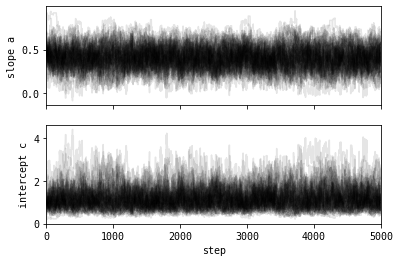

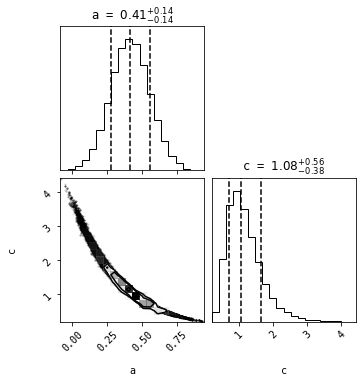

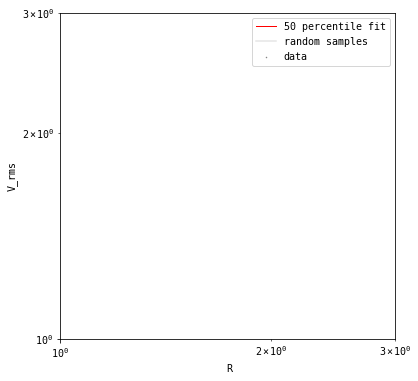

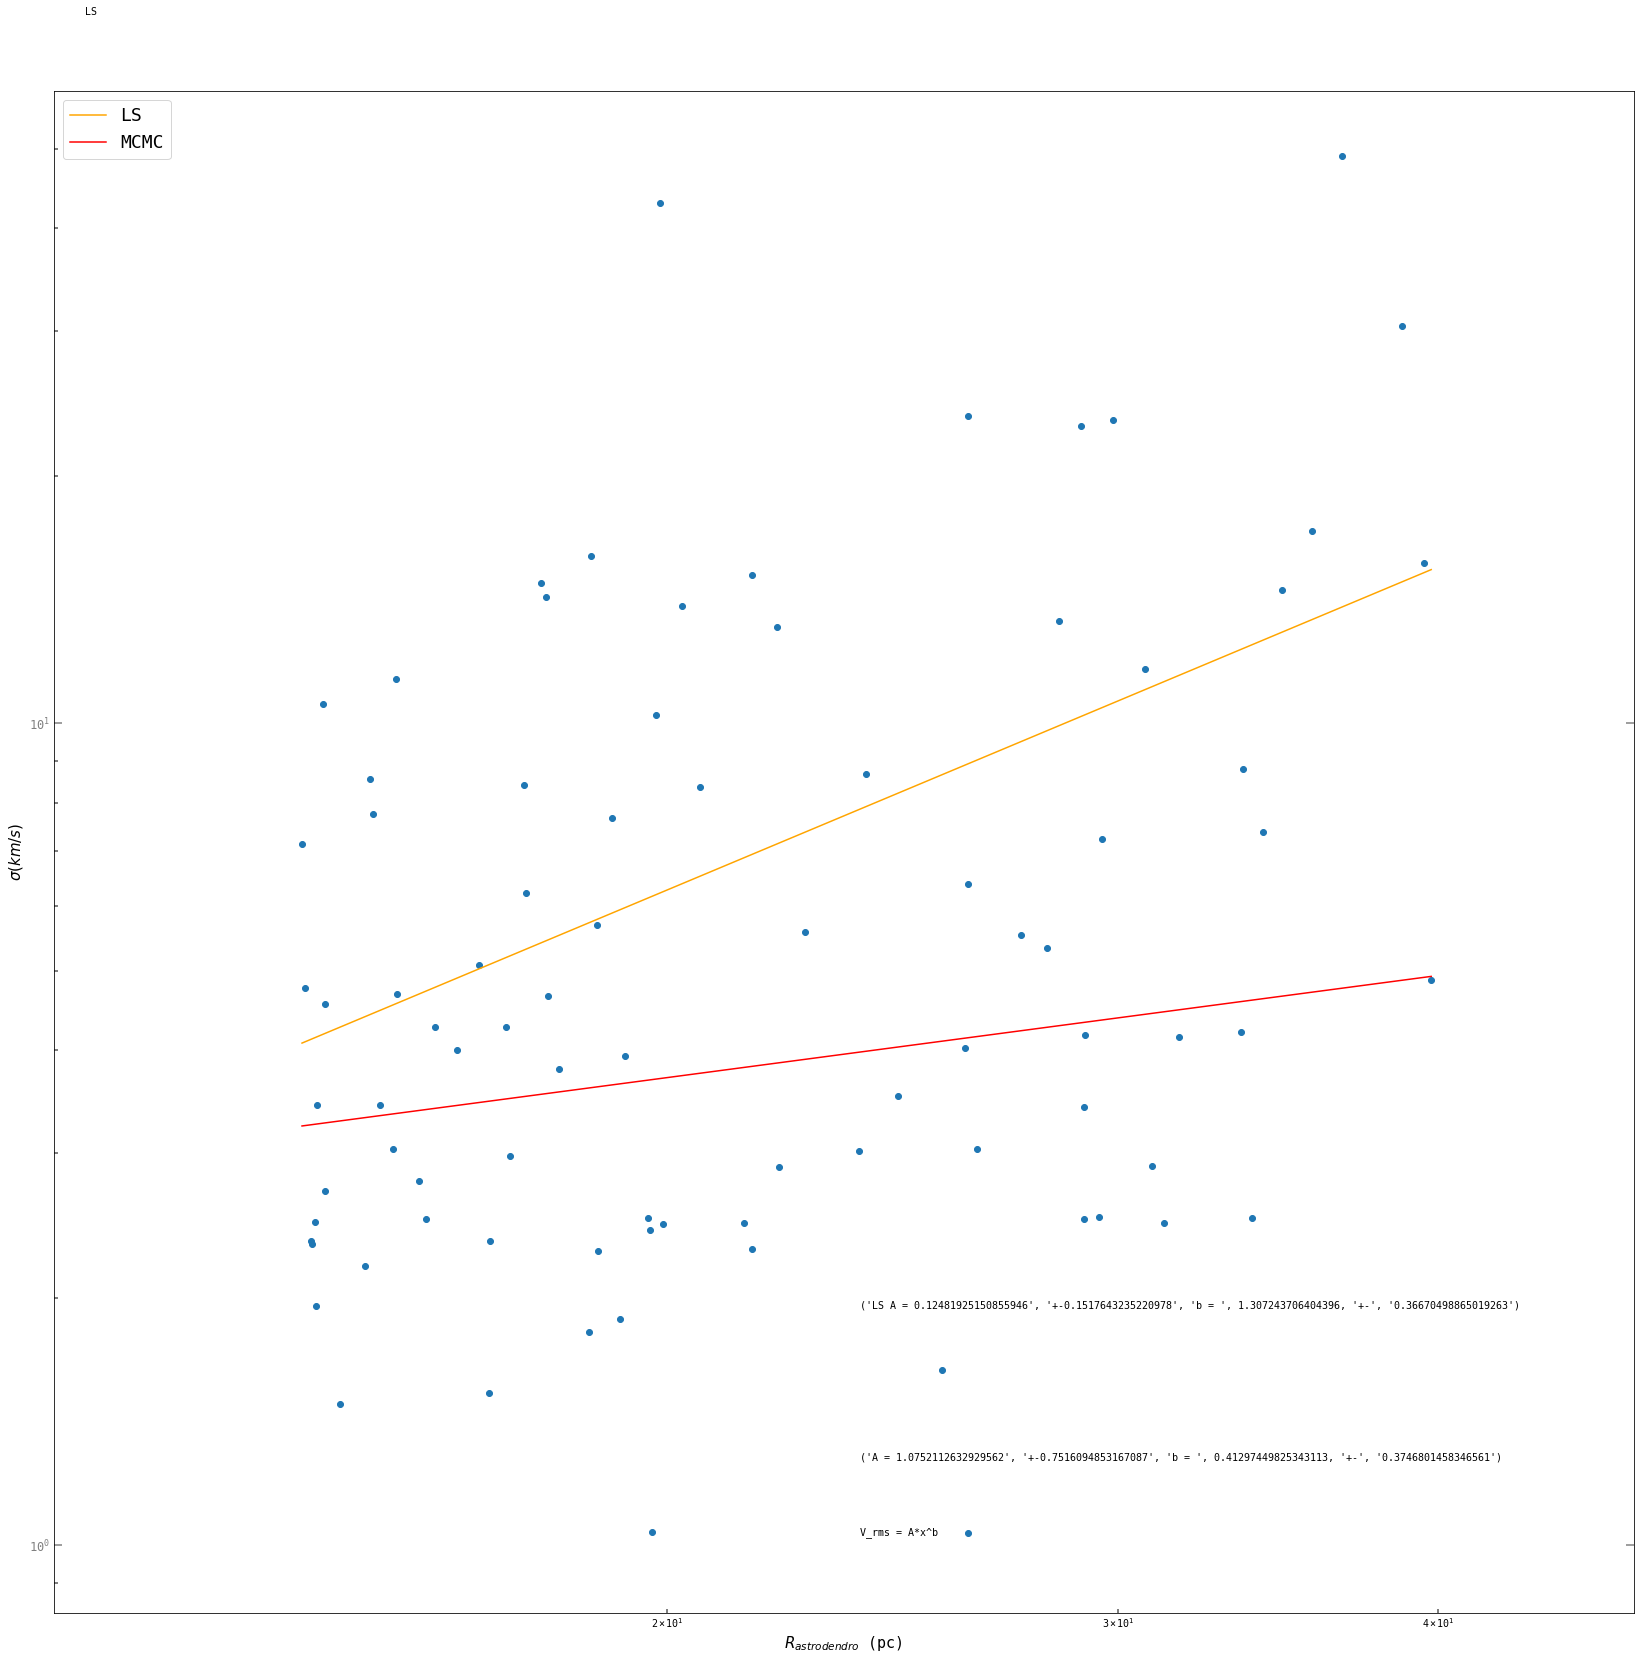

In [7]:
#test

r=5
print(np.shape(Results_CMZ[r]),File_Descriptors_cmz[r])
try:
    Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances,r_err = Results_CMZ[r]
    #Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances,r_err = Results_NGC[r]
except:
    Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances = Results_CMZ[r]
    #Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances = Results_NGC[r]
    r_err=copy.deepcopy(Size)
    print("No r_errors found")

Size_Leaves, Size_Branches, Size_All = strip_units(Size[0]), strip_units(Size[1]), (np.concatenate((strip_units(Size[0]), strip_units(Size[1]))))
###########################################################################
RMS_Velocity_Leaves, RMS_Velocity_Branches, RMS_Velocity_All = strip_units(RMS_Velocity[0]), strip_units(RMS_Velocity[1]), (np.concatenate((strip_units(RMS_Velocity[0]), strip_units(RMS_Velocity[1]))))
###########################################################################
V_rms_err_Leaves, V_rms_err_Branches, V_rms_err_All = strip_units(V_rms_err[0]), strip_units(V_rms_err[1]), (np.concatenate((strip_units(V_rms_err[0]), strip_units(V_rms_err[1]))))
###########################################################################
r_err_Leaves, r_err_Branches, r_err_All = strip_units(r_err[0]), strip_units(r_err[1]), (np.concatenate((strip_units(r_err[0]), strip_units(r_err[1]))))

for k in range(len(Size_All)):
    if Size_All[k]<14:
    
        Size_All[k]=np.nan
        pass
    if Size_All[k]>40:
        Size_All[k]=np.nan
        pass
    
    #print(Size_All[k])
_,RMS_Velocity_All = crossmatch(Size_All,RMS_Velocity_All)
_,r_err_All = crossmatch(Size_All,r_err_All)
Size_All,V_rms_err_All = crossmatch(Size_All,V_rms_err_All)

for i in range(len(r_err_All)):
    r_err_All[i] = .1
    #V_rms_err_All[i]=1
    
    pass
#V_rms_err_All=Size_All/3
fac=1
fac2=fac*1
print(V_rms_err_All*fac2,r_err_All*fac)


"""

A = 1
b = 1
num_points = 10000

# Generate x values (log-uniformly spaced to better cover range)
x = np.sort(np.random.uniform(1.5, 10, num_points))  # avoid zero
# Generate corresponding y values following power law with some noise
y_true = A * x**b
noise = np.random.normal(0, 1 * y_true)  # 10% noise
y = y_true + noise

print(min(y),"AAA")
Size_All= x
r_err_All = np.full(np.shape(y),1)#x/1
RMS_Velocity_All = y 
V_rms_err_All = np.full(np.shape(y),1)#y/1
"""
#Define the form of the function for the curve_fit
def func(R,a,b):
    return a*R**(b)

popt_All, pcov_All = curve_fit(func,  Size_All,RMS_Velocity_All)

print("Least squrare fit on the data directly:" ,popt_All, np.sqrt(pcov_All))


make_MCMC_fit(M_1=(Size_All),M_2=(RMS_Velocity_All),M_1_err=(r_err_All*fac),M_2_err=(V_rms_err_All*fac2),nsteps=50000, nwalkers=500,input_="linear",temp=.1)




# 4a. Size-Linewidth Plots Comparison

In [28]:
#Verify units/check values cmz/ngc
for i in range(len(File_Descriptors_cmz)):
    try:
        Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances = Results_CMZ[i]
    except:
        Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances,r_err = Results_CMZ[i]
    Size_Linewidth_Leaves,Size_Linewidth_Branches,Size_Linewidth_All = Fit_Results_CMZ[i][0]
    Radius_Luminosity_All,CD_SL_Ratio = Fit_Results_CMZ[i][1],Fit_Results_CMZ[i][2]
    print("Size in", Size[0][0].unit,"Sigma in",RMS_Velocity[0][0].unit,"Luminosity in",Luminosity[0][0].unit,"CD in",CDs[0][0].unit,'Mom 0 in',MOM0_FLUX[0][0].unit,   ". ",File_Descriptors_cmz[i],np.shape(Results_CMZ[i]),'with',len(Results_CMZ[i][0][0]), "leaves and",len(Results_CMZ[i][0][1]) ,'branches')




Size in pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s .  cmz_H13CN_J1_0_Low_Delta_ (9, 2) with 127 leaves and 37 branches
Size in pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s .  cmz_HCN_J1-0_Low_Delta_ (9, 2) with 228 leaves and 67 branches
Size in pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s .  cmz_H13COp_J1_0_Low_Delta_ (9, 2) with 69 leaves and 33 branches
Size in pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s .  cmz_3mm_HCO+_J1-0_Low_Delta_ (9, 2) with 92 leaves and 43 branches
Size in pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s .  cmz_CO_J3_2__Low_Delta_ (9, 2) with 3387 leaves and 1161 branches
Size in pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s .  cmz_CO_J1_0_Low_Delta_ (9, 2) with 220 leaves and 73 branches
Size in pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K

# All structures

# All, leaves, branches:


['NGC_253_H13CN_J1-0_', 'NGC_253_HCN_J1-0_', 'NGC_253_H13CO+_J1-0_', 'NGC_253_HCO+_J1-0_', 'NGC_253_CO_J3-2_', 'NGC_253_CO_J1-0_', 'NGC_253_SiO_J2-1_', 'NGC_253_H13CN_J4-3_', 'NGC_253_HCN_J4-3_', 'NGC_253_HCO+_J4-3_'] ['cmz_H13CN_J1_0_', 'cmz_HCN_J1-0_', 'cmz_H13COp_J1_0_', 'cmz_3mm_HCO+_J1-0_', 'cmz_CO_J3_2__', 'cmz_CO_J1_0_', 'cmz_SiO_J2_1_', 'NOT AVAILABLE', 'cmz_HCN_J4_3_', 'NOT AVAILABLE']
input data is of type linear fitting to powerlaw...
2.3772124338612706 8.45691374515261 2.5160789514512194 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.8874816566147588 3.271022606582852
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.8874816566147588, 0.007369966687821513] [3.271022606582852, 0.24906469789879387] 0.8961982088489748 2.611387634829116
[[0.86735079 2.27503204]
 [0.86735079 2.27503204]
 [0.87198928 2.3470704 ]
 ...
 [0.80264738 2.95697108]
 [0.82347993 2.87148

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_H13CN_J1_0_
    least sq  max like      MCMC
a   0.887482  0.896198  0.892001
a-  0.007370            0.058379
a+  0.007370            0.057281
c   3.271023  2.611388  2.624363
c-  0.249065            0.228360
c+  0.249065            0.218627



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.8874816566147588 0.08584851010833859 14404.701503725306 90.90988102698284 1866.4768451090747
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.8920010217760694 0.2416174260685753 3283.705493432018 41.708847898305656 421.0786071824476
Using MCMC fit with assumed errors, r_err =  0.1 min r = 1

cmz_H13CN_J1_0_ Compare to NGC_253_H13CN_J1-0_ Size-Linewidth  MCMC

CMZ fit params and covariance error: a =  2.6243631777332084  +-  0.47787015355773965 , b =  0.8920010217760694  +-  0.2416174260685753

Structures plotted:  58

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_H13CN_J1-0_
    least sq  max like      MCMC
a   0.577207  0.591420  0.572971
a-  0.002785            0.104164
a+  0.002785            0.108490
c   6.887230  6.506641  6.660275
c-  0.462966            1.075226
c+  0.462966            0.986323



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.5772069452265323 0.05277282658819522 29136444.11989921 5573.197444616618 7713111.386249337
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.572970762647582 0.3227450599774697 17109829.312172297 1172.7792841761006 4573776.243332856
NGC253 fit params and covariance error: a =  6.66027491438905  +-  1.0369312811903857 , b =  0.572970762647582  +-  0.3227450599774697

Structures plotted:  15



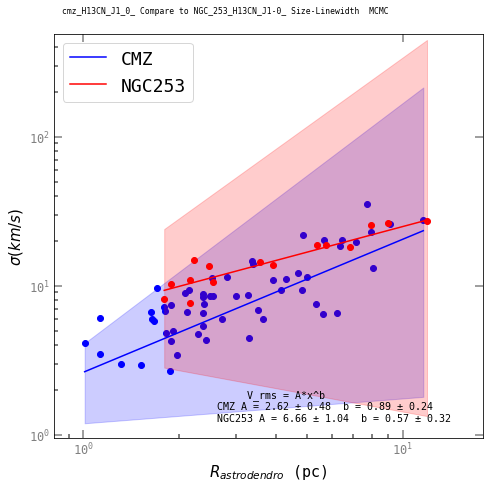

input data is of type linear fitting to powerlaw...
2.533431136416782 7.973970314200333 2.2458997491321253 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.7188743571009533 3.41779506999403
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.7188743571009533, 0.0035693083157959595] [3.41779506999403, 0.11669499560409984] 0.5743108415354873 2.5413297921369065
[[0.48465115 2.73365768]
 [0.49198178 2.70722759]
 [0.46145774 2.76523662]
 ...
 [0.55146252 2.64918912]
 [0.53764259 2.68527091]
 [0.52936989 2.71288778]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_HCN_J1-0_
    least sq  max like      MCMC
a   0.718874  0.574311  0.571376
a-  0.003569            0.048763
a+  0.003569            0.049208
c   3.417795  2.541330  2.546743
c-  0.116695            0.146246
c+  0.116695            0.141218



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.7188743571009533 0.059743688501765264 13698.386860478644 60.683441360833406 2616.947860841977
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.5713759291931795 0.22082450993887878 1312.5590683487321 29.09689332223769 352.16235351966117
Using MCMC fit with assumed errors, r_err =  0.1 min r = 1

cmz_HCN_J1-0_ Compare to NGC_253_HCN_J1-0_ Size-Linewidth  MCMC

CMZ fit params and covariance error: a =  2.5467429276319966  +-  0.38242137932234266 , b =  0.5713759291931795  +-  0.22082450993887878

Structures plotted:  135

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
1

mkdir: missing operand
Try 'mkdir --help' for more information.


Created 
plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCN_J1-0_
    least sq  max like      MCMC
a   0.713517  0.836575  0.832575
a-  0.002476            0.055041
a+  0.002476            0.056369
c   5.054269  3.601955  3.615986
c-  0.265746            0.301162
c+  0.265746            0.287569



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.7135172291852816 0.049760540621720264 585849.8432903154 598.7477634330403 113310.2216021777
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.8325750825910015 0.23460883441337482 28090.594489267693 112.80061358486108 4130.340423828569
NGC253 fit params and covariance error: a =  3.6159858478058946  +-  0.5487819658407326 , b =  0.8325750825910015  +-  0.23460883441337482

Structures plotted:  49



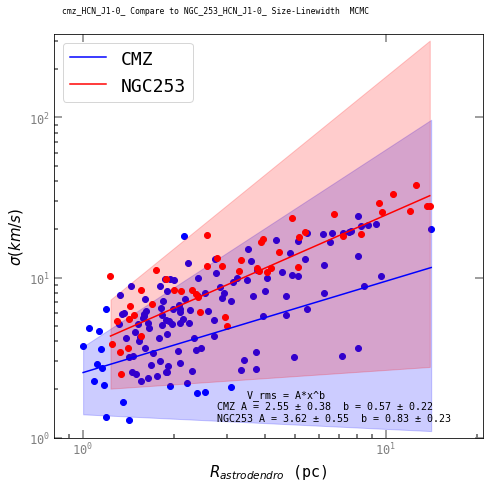

input data is of type linear fitting to powerlaw...
6.2773702492551795 13.270287028973787 2.0382323662032324 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 1.0162974619106726 2.2353225615048604
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [1.0162974619106726, 0.02142511988157619] [2.2353225615048604, 0.4723324087399708] 0.8078393824644646 2.458344650705005
[[0.76192472 2.39542136]
 [0.82466813 2.25540758]
 [0.82466813 2.25540758]
 ...
 [0.70068869 2.95200795]
 [0.70727601 2.92481856]
 [0.70727601 2.92481856]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_H13COp_J1_0_
    least sq  max like      MCMC
a   1.016297  0.807839  0.796747
a-  0.021425            0.088087
a+  0.021425            0.085877
c   2.235323  2.458345  2.499513
c-  0.472332            0.371295
c+  0.472332            0.343857



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.0162974619106726 0.14637322119013502 1784.925209680989 44.08236591776531 171.91847951531574
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.7967465364129174 0.29679431661648975 1978.151628613161 27.118314828021308 315.8733901271871
Using MCMC fit with assumed errors, r_err =  0.1 min r = 1

cmz_H13COp_J1_0_ Compare to NGC_253_H13CO+_J1-0_ Size-Linewidth  MCMC

CMZ fit params and covariance error: a =  2.499513041518677  +-  0.6093400623849389 , b =  0.7967465364129174  +-  0.29679431661648975

Structures plotted:  28

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw..

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_H13CO+_J1-0_
    least sq  max like      MCMC
a   0.717779  0.748454  0.738456
a-  0.004397            0.084779
a+  0.004397            0.086076
c   4.491815  3.997517  4.042681
c-  0.313042            0.529397
c+  0.313042            0.498120



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.7177792974214686 0.06631026539835103 162029.46825480787 341.76491350710086 31032.353178984602
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.7384560192899331 0.29116773039849814 60413.97172608955 125.45001685588001 11032.688813459145
NGC253 fit params and covariance error: a =  4.042681368699491  +-  0.727596497912435 , b =  0.7384560192899331  +-  0.29116773039849814

Structures plotted:  20



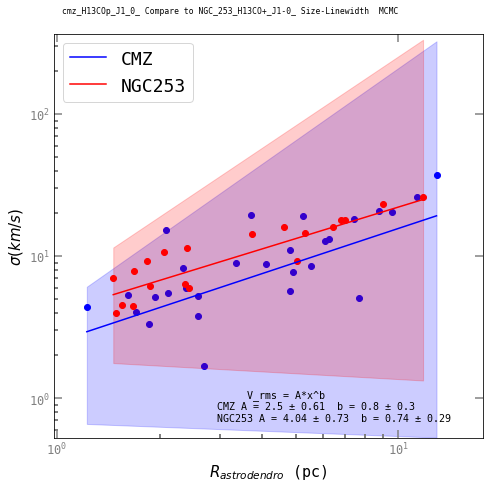

input data is of type linear fitting to powerlaw...
6.044004254266891 3.1402972749917373 1.0126452542938074 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.7306012552816871 3.07196223613296
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.7306012552816871, 0.010678626401749087] [3.07196223613296, 0.42200600645738456] 0.546257207818627 2.3715976539960058
[[0.48356242 2.53125796]
 [0.4959291  2.47150803]
 [0.4959291  2.47150803]
 ...
 [0.68739166 1.9637436 ]
 [0.68739166 1.9637436 ]
 [0.68739166 1.9637436 ]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_3mm_HCO+_J1-0_
    least sq  max like      MCMC
a   0.730601  0.546257  0.525837
a-  0.010679            0.119389
a+  0.010679            0.115742
c   3.071962  2.371598  2.442767
c-  0.422006            0.452378
c+  0.422006            0.408763



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.7306012552816871 0.10333743949677235 6346.926827053863 78.54497490611523 1180.2180059027219
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.5258368216589207 0.34552706960984164 930.2598060980602 16.674378030600646 277.1835387766231
Using MCMC fit with assumed errors, r_err =  0.1 min r = 1

cmz_3mm_HCO+_J1-0_ Compare to NGC_253_HCO+_J1-0_ Size-Linewidth  MCMC

CMZ fit params and covariance error: a =  2.4427674350640305  +-  0.6725901719901246 , b =  0.5258368216589207  +-  0.34552706960984164

Structures plotted:  44

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerla

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCO+_J1-0_
    least sq  max like      MCMC
a   0.675154  0.869990  0.866996
a-  0.002330            0.046280
a+  0.002330            0.046746
c   4.860174  3.039100  3.049291
c-  0.221641            0.223834
c+  0.221641            0.220253



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.6751541489483301 0.04827487583454396 343026.5750102163 418.4168857364924 72472.56261102113
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.866996102753021 0.2151289236855475 8246.83889805343 66.77972541503054 1120.1892689516771
NGC253 fit params and covariance error: a =  3.0492914079529734  +-  0.47311067391172396 , b =  0.866996102753021  +-  0.2151289236855475

Structures plotted:  55



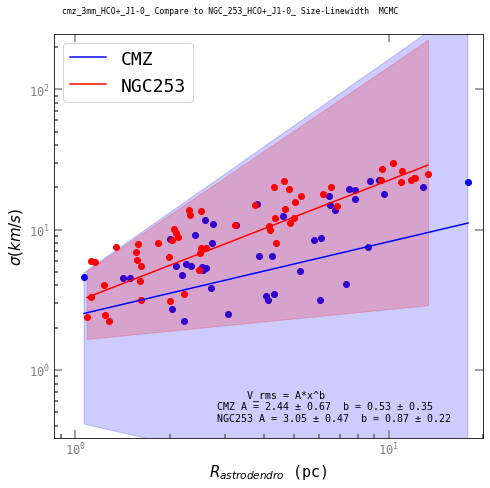

input data is of type linear fitting to powerlaw...
2.9330338868678623 3.902884571316188 0.945502247687858 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.6631583111573149 2.901142286686465
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.6631583111573149, 0.00035530738567486126] [2.901142286686465, 0.010658144047167948] 0.439274145218198 2.115460966817239
[[0.4647657  1.95141869]
 [0.4647657  1.95141869]
 [0.4647657  1.95141869]
 ...
 [0.43830741 2.07994423]
 [0.43830741 2.07994423]
 [0.43830741 2.07994423]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_CO_J3_2__
    least sq  max like      MCMC
a   0.663158  0.439274  0.439145
a-  0.000355            0.014145
a+  0.000355            0.014261
c   2.901142  2.115461  2.115588
c-  0.010658            0.035280
c+  0.010658            0.035185



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.6631583111573149 0.0188495990852554 3666.9129298551447 9.488979989469328 796.4202366129597
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.4391450061047111 0.11893289965284541 358.701390752041 17.891360338262814 130.49325205204212
Using MCMC fit with assumed errors, r_err =  0.1 min r = 0.8

cmz_CO_J3_2__ Compare to NGC_253_CO_J3-2_ Size-Linewidth  MCMC

CMZ fit params and covariance error: a =  2.115588054415042  +-  0.18782871730403342 , b =  0.4391450061047111  +-  0.11893289965284541

Structures plotted:  1206

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
2.30

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_CO_J3-2_
    least sq  max like      MCMC
a   0.724949  0.580556  0.580475
a-  0.000497            0.018470
a+  0.000497            0.018579
c   3.817561  3.258846  3.259376
c-  0.023758            0.064122
c+  0.023758            0.064103



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.7249486556417017 0.02228254425032742 34874.59930089988 43.68342421201051 6569.927404085059
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.5804748658446544 0.13590362749882318 6915.938538081645 75.61094390021508 1817.0892505043105
NGC253 fit params and covariance error: a =  3.2593762592010425  +-  0.2532240790757876 , b =  0.5804748658446544  +-  0.13590362749882318

Structures plotted:  583



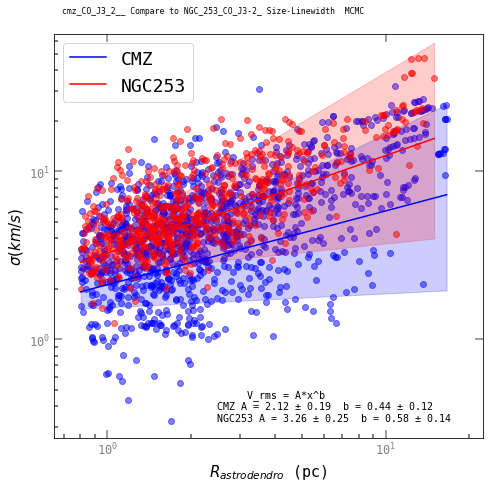

input data is of type linear fitting to powerlaw...
20.604951372863326 8.37030365935144 2.8660503902850616 1.0
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 1.4293933785174087 0.09026103151719234
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [1.4293933785174087, 0.014278580085241497] [0.09026103151719234, 0.0018543309537171193] 0.5789426619207046 0.7426047782359211
[[0.54196224 0.83458942]
 [0.54196224 0.83458942]
 [0.54455484 0.82593114]
 ...
 [0.48778998 0.9459292 ]
 [0.49856355 0.92328123]
 [0.50045636 0.91941556]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...


mkdir: missing operand
Try 'mkdir --help' for more information.


Created 
plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_CO_J1_0_
    least sq  max like      MCMC
a   1.429393  0.578943  0.566849
a-  0.014279            0.058197
a+  0.014279            0.059855
c   0.090261  0.742605  0.770881
c-  0.001854            0.158039
c+  0.001854            0.129796



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.4293933785174087 0.11949301270468285 33.0867728603846 1.0473539143364317 1.2310084427777463
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.5668488617699265 0.24124044541305117 21.76355153713707 3.7500719146865924 5.900392555923127
Using MCMC fit with assumed errors, r_err =  1 min r = 9.5

cmz_CO_J1_0_ Compare to NGC_253_CO_J1-0_ Size-Linewidth  MCMC

CMZ fit params and covariance error: a =  0.7708809064217894  +-  0.3975415097801258 , b =  0.5668488617699265  +-  0.24124044541305117

Structures plotted:  177

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
16.20978

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_CO_J1-0_
    least sq  max like      MCMC
a   1.003433  1.335542  1.332029
a-  0.000931            0.029346
a+  0.000931            0.029986
c   0.664830  0.127764  0.129401
c-  0.008981            0.015829
c+  0.008981            0.014068



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.003432628381338 0.030507613370268156 46.5868126837754 0.9841498947855355 4.622004565045519
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.3320291351372164 0.17130608277449802 28.935429819693457 5.113141767329398 1.347102998454032
NGC253 fit params and covariance error: a =  0.12940080281289876  +-  0.12581388366490587 , b =  1.3320291351372164  +-  0.17130608277449802

Structures plotted:  180



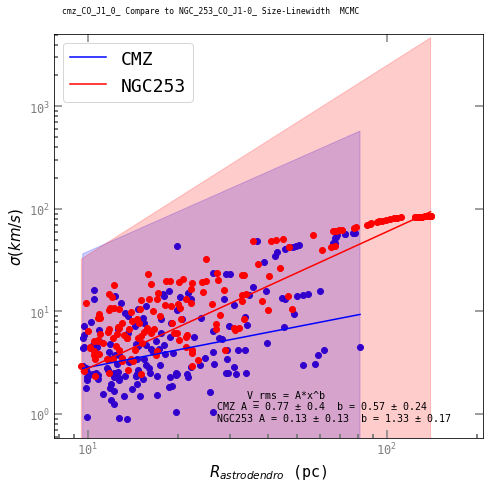

input data is of type linear fitting to powerlaw...
2.456587764360523 4.191847312770185 1.2577741157489633 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.6667353615512461 3.952412562719582
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.6667353615512461, 0.028356478117078716] [3.952412562719582, 1.0381166588315962] 0.8393040727382146 2.5282552301863945
[[0.87599756 2.3518995 ]
 [0.8393854  2.4564001 ]
 [0.8393854  2.4564001 ]
 ...
 [0.80903847 2.44295341]
 [0.74331312 2.68218894]
 [0.64161185 3.16779035]]
plotting walkers ...


mkdir: missing operand
Try 'mkdir --help' for more information.


Created 
plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_SiO_J2_1_
    least sq  max like      MCMC
a   0.666735  0.839304  0.827121
a-  0.028356            0.097488
a+  0.028356            0.097673
c   3.952413  2.528255  2.563762
c-  1.038117            0.356779
c+  1.038117            0.328305



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.6667353615512461 0.16839381852395507 41605.2297195574 315.41755871695193 8962.157310778852
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.8271205605260992 0.3122306716670799 2459.7007719676712 30.37050817262309 366.23657755297455
Using MCMC fit with assumed errors, r_err =  0.1 min r = 1

cmz_SiO_J2_1_ Compare to NGC_253_SiO_J2-1_ Size-Linewidth  MCMC

CMZ fit params and covariance error: a =  2.5637617169075684  +-  0.5973095470830719 , b =  0.8271205605260992  +-  0.3122306716670799

Structures plotted:  28

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
5.275117

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_SiO_J2-1_
    least sq  max like      MCMC
a   0.780537  0.788496  0.768684
a-  0.014938            0.135103
a+  0.014938            0.134299
c   3.942455  3.582587  3.667010
c-  0.693429            0.714133
c+  0.693429            0.658785



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.7805368937966393 0.12222179907671608 52843.4945700969 290.50594816527007 8759.002216341067
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.7686835846130989 0.3675636116131113 27270.560798005798 66.26821090398461 4645.264892723165
NGC253 fit params and covariance error: a =  3.6670104843507216  +-  0.8450640567794784 , b =  0.7686835846130989  +-  0.3675636116131113

Structures plotted:  13



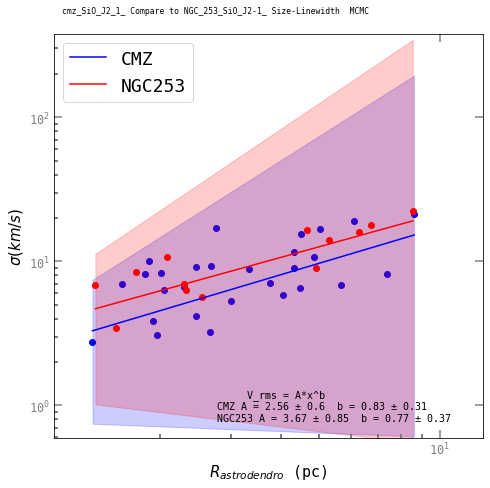

The beam or veloctiy resolution for NGC253 and the CMZ are not properly matched:
3.0 pc 4.8 pc
2.5 km / s 3.4 km / s
NGC_253_H13CN_J4-3_ NOT AVAILABLE
input data is of type linear fitting to powerlaw...
2.3772124338612706 8.45691374515261 2.5160789514512194 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.8874816566147588 3.271022606582852
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.8874816566147588, 0.007369966687821513] [3.271022606582852, 0.24906469789879387] 0.8961982088489748 2.611387634829116
[[1.12028344 1.74965731]
 [1.12028344 1.74965731]
 [1.09410516 1.78040513]
 ...
 [0.78603917 3.2089579 ]
 [0.78603917 3.2089579 ]
 [0.81897309 3.02168284]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NOT AVAILABLE
    least sq  max like      MCMC
a   0.887482  0.896198  0.892973
a-  0.007370            0.058027
a+  0.007370            0.058539
c   3.271023  2.611388  2.621373
c-  0.249065            0.230910
c+  0.249065            0.218708



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.8874816566147588 0.08584851010833859 14404.701503725306 90.90988102698284 1866.4768451090747
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.8929731247600013 0.24088860044166024 3268.483025044975 41.54792722828114 418.1894853412906
Using MCMC fit with assumed errors, r_err =  0.1 min r = 1

NOT AVAILABLE Compare to NGC_253_H13CN_J4-3_ Size-Linewidth  MCMC

NGC_253_H13CN_J4-3_ is not available in the CMZ
Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
1.7769403699430149 18.987060405036576 6.969209033683409 0.1
masking bad values ...
restricting fit to [None, None] ...

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_H13CN_J4-3_
    least sq  max like      MCMC
a   0.914567  2.019023  1.851045
a-  0.121276            0.103661
a+  0.121276            0.154586
c   7.073055  1.915269  2.200935
c-  5.062937            0.329028
c+  5.062937            0.281792



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.9145667466207296 0.3482467873651423 97189939.11309646 33665.26442390413 11831901.987866392
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.8510447254899833 0.3219646168603338 11271.458868922311 64.23935712553806 158.8310493202235
NGC253 fit params and covariance error: a =  2.2009354050830843  +-  0.5736092707064411 , b =  1.8510447254899833  +-  0.3219646168603338

Structures plotted:  11



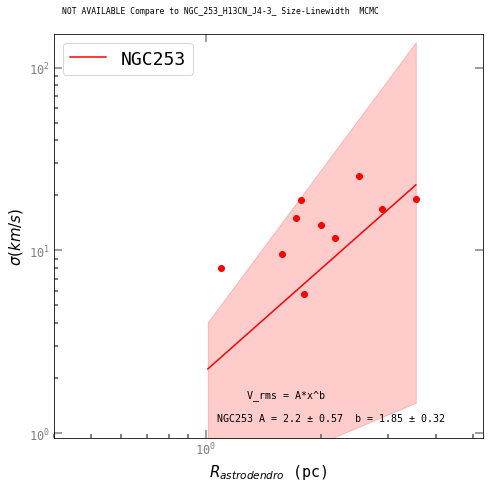

input data is of type linear fitting to powerlaw...
2.127798493004818 5.733256052622191 2.108629364314519 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.6964410077187836 5.026000449135785
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.6964410077187836, 0.0016650332583037298] [5.026000449135785, 0.12894756355157036] 0.848845804864502 3.38511492781786


In [ ]:
# Make plots:

CMZ_names = File_Descriptors_cmz#[5]
NGC_names = File_Descriptors_NGC#[5]
MCMC=True
ls=False
use_manual_error_v=False
use_manual_error_r=True
fit_results_cmz = [[],[]]
fit_results_ngc = [[],[]]
'''
    "NGC_253_H13CN_J1-0_",
    "NGC_253_HCN_J1-0_",
    "NGC_253_H13CO+_J1-0_",
    "NGC_253_HCO+_J1-0_",
    "NGC_253_CO_J3-2_",
    "NGC_253_CO_J1-0_",
    "NGC_253_SiO_J2-1_",
    "NGC_253_H13CN_J4-3_",
    "NGC_253_HCN_J4-3_",
    "NGC_253_HCO+_J4-3_"
'''
min_rs = [1,1,1,1,.8,9.5,1,1,1,.9] #pc CO 10 should be 32? CO 32 should be .8 or 1?
#min_rs = [0,0,0,0,0,0,0,0,0,0] #pc CO 10 should be 32? CO 32 should be .8 or 1?
max_rs = [9999,9999,9999,9999,9999,9999,99999,9999,9999,99999]
#manual errors:
#r_errs=[.43,.43,.43,.43,.6,14.6,1,1,1,1,1,1,1] #pc
#r_errs=[.86,.86,.86,.86,.6,14.6,.96,.6,.6,.6] #pc 1/5 of the beam
#r_errs=[.86,.86,.86,.86,.6,1,.96,.6,.6,.6] #pc 1/5 of the beam
r_errs=[.1,.1,.1,.1,.1,1,.1,.1,.1,.1] #pc 1/5 of the beam
#v_errs=[.5,.5,.5,.5,.5,10,.5,.5,.5,.5,] #km/s The beam size of CO 1-0 is 23 times larger than CO 3-2, so i increase the v error by 23 times (the V scales with beam size and velocity resolution)
v_errs=[.5,.5,.5,.5,.5,1,.5,.5,.5,.5,] #km/s The beam size of CO 1-0 is 23 times larger than CO 3-2, so i increase the v error by 23 times (the V scales with beam size and velocity resolution)
#min_rs = [1,1,1,1,.8,14.6,0,0,0,0] #pc CO 10 should be 32? CO 32 should be .8 or 1?
#print("Size in ", Results_CMZ[0][0][0][0].unit,"Sigma in",Results_CMZ[0][1][0][0].unit,"Luminosity in",Results_CMZ[0][3][0][0].unit,"CD in",Results_CMZ[0][4][0][0].unit,'Mom 0 in',Results_CMZ[0][6][0][0].unit )
############################################################


#make a meta function for doing the plots of leaves and branches and stuff
#make_plots(CMZ_names,NGC_names,MCMC,use_manual_error_v_=[False,[0]],use_manual_error_r_=[True,r_errs],min_rs=min_rs,max_rs=max_rs,which="All",save_name="min r = 10")
make_plots(CMZ_names,NGC_names,MCMC,use_manual_error_v_=[False,[0]],use_manual_error_r_=[True,r_errs],min_rs=min_rs,max_rs=max_rs,which="All",save_name="MCMC",fs=8,plot_errors=False,ls=14,figsize=(8,8))

In [ ]:
make_plots(CMZ_names,NGC_names,MCMC,use_manual_error_v_=[False,[0]],use_manual_error_r_=[True,r_errs],min_rs=min_rs,max_rs=max_rs,which="Leaves",save_name="MCMC",fs=8,plot_errors=False)

In [ ]:
make_plots(CMZ_names,NGC_names,MCMC,use_manual_error_v_=[False,[0]],use_manual_error_r_=[True,r_errs],min_rs=min_rs,max_rs=max_rs,which="Branches",save_name="MCMC",fs=8,plot_errors=False)
#with open("Result Files/LS fit results", 'wb') as file:
#    pickle.dump([fit_results_cmz,fit_results_ngc], file) #save the fit resutls as form [[cmzall[vars,covars],leaves[vars,covars],branches[vars,covars]], [same for ngc]]
with open("Result Files/MCMC fit results", 'wb') as file:
    pickle.dump([fit_results_cmz,fit_results_ngc], file) #save the fit resutls as form [[cmzall[vars,covars],leaves[vars,covars],branches[vars,covars]], [same for ngc]]


In [40]:
print(fit_results_cmz[0][0],fit_results_ngc[0][0] )
print(fit_results_cmz[1][0],fit_results_ngc[1][0] )

[2.621605689477284, 0.8923773738410441] [6.661566365187283, 0.5715460494096253]
[[0.22976043811388935, 0], [0, 0.058139072032998174]] [[1.0827471820001815, 0], [0, 0.1059400127940735]]


# Side by side plots

# Compare fit results for all lines

average parameters for LS fit results :
a_cmz = 2.995739850534216 +- 0.19524322995962548
b_cmz = 0.8511228487316032 +- 0.03701739880896413
a_ngc = 4.836333527176708 +- 0.29152825530282644
b_ngc = 0.7658469290003526 +- 0.040097832146573045


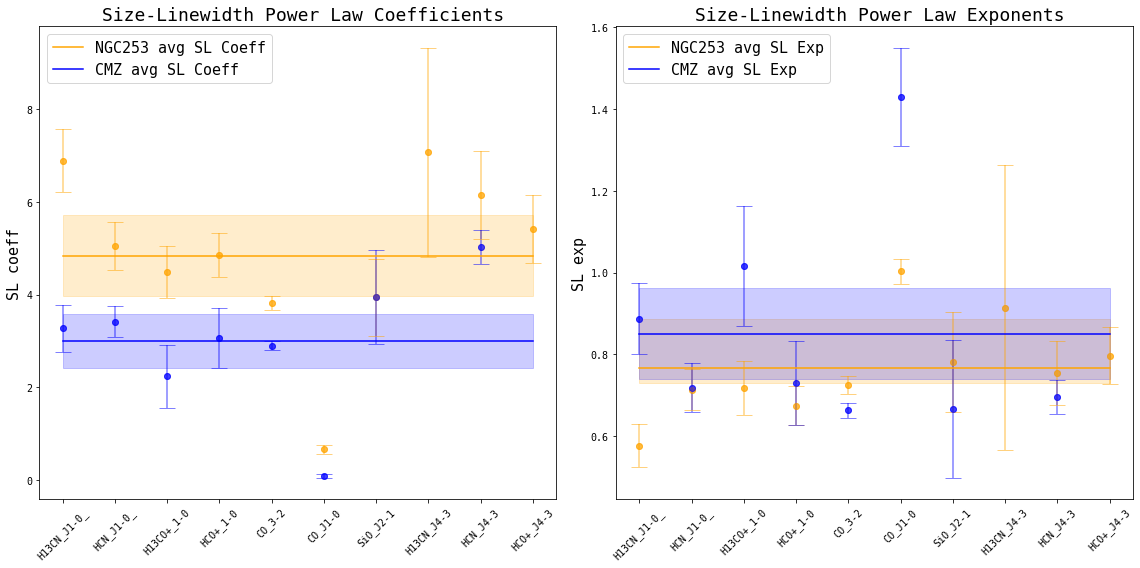

In [196]:
#
#All structures
#
#
#Compare fits for molecules


#with open("Result Files/MCMC fit results", 'rb') as file:
#    save_name="MCMC fit results"
#    fit_results_cmz,fit_results_ngc = pickle.load(file)
    
with open("Result Files/LS fit results", 'rb') as file:
    save_name="LS fit results"
    fit_results_cmz,fit_results_ngc = pickle.load(file)
    
    
Line_Names = ["H13CN_J1-0_","HCN_J1-0_",'H13CO+_1-0',"HCO+_1-0","CO_3-2","CO_J1-0","SiO_J2-1","H13CN_J4-3","HCN_J4-3","HCO+_J4-3"]
CMZ_has_line=[1            ,1          ,1           ,1         ,1       ,1        ,1         ,0           ,1         ,0]#1=yess 0=no
CMZ_has_line_n=[1            ,1          ,1           ,1         ,1       ,1        ,1         ,np.nan           ,1         ,np.nan]#1=yess 0=no

mean_c=0
mean_e=0

fig = plt.figure(1,figsize=(16,8))
axA = pylab.subplot(1,2, 1)
axA2 = pylab.subplot(1,2, 2)

#for l in range(len(fit_results_ngc)):
fit_results_ngc = fit_results_ngc[0:len(Line_Names)]#all structures
fit_results_cmz = fit_results_cmz[0:len(Line_Names)]#all structures
#fit_results_ngc = fit_results_ngc[len(Line_Names):len(Line_Names)*2]#leaves
#fit_results_cmz = fit_results_cmz[len(Line_Names):len(Line_Names)*2]#leaves
#fit_results_ngc = fit_results_ngc[len(Line_Names)*2:]#branches
#fit_results_cmz = fit_results_cmz[len(Line_Names)*2:]#branches
c1,c2,c3,c4=[],[],[],[]#for clarity, use these to store the values
n1,n2,n3,n4=[],[],[],[]#for clarity, use these to store the values
#for l in range(len(fit_results_ngc[0])):
for l in range(10):
    #num = len(fit_results_ngc[0])
    num = 10
    spacing =1 # /num +1
    #load the restults
    ngc_coeff,ngc_exp,ngc_coeff_err,ngc_exp_err = fit_results_ngc[0][l][0],fit_results_ngc[0][l][1],np.sqrt(fit_results_ngc[1][l][0][0]),np.sqrt(fit_results_ngc[1][l][1][1])
    cmz_coeff,cmz_exp,cmz_coeff_err,cmz_exp_err = fit_results_cmz[0][l][0],fit_results_cmz[0][l][1],np.sqrt(fit_results_cmz[1][l][0][0]),np.sqrt(fit_results_cmz[1][l][1][1])
    if CMZ_has_line[l]==0:
        cmz_coeff,    cmz_exp,    cmz_coeff_err ,    cmz_exp_err=np.nan,np.nan,np.nan,np.nan

    #plots exp
    axA2.scatter(spacing*l,ngc_exp,color='orange',alpha=.5)
    axA2.errorbar(spacing*l,ngc_exp, yerr= ngc_exp_err, fmt="o",capsize=8,color='orange',alpha=.5)
    axA2.scatter(spacing*l,cmz_exp,color='blue',alpha=.5)
    axA2.errorbar(spacing*l,cmz_exp, yerr= cmz_exp_err, fmt="o",capsize=8,color='blue',alpha=.5)
    #plots coeff
    axA.scatter(spacing*l,ngc_coeff,color='orange',alpha=.5)
    axA.errorbar(spacing*l,ngc_coeff, yerr= ngc_coeff_err, fmt="o",capsize=8,color='orange',alpha=.5)
    axA.scatter(spacing*l,cmz_coeff,color='blue',alpha=.5)
    axA.errorbar(spacing*l,cmz_coeff, yerr= cmz_coeff_err, fmt="o",capsize=8,color='blue',alpha=.5)
    
    if CMZ_has_line[l]==0:
        cmz_coeff,    cmz_exp,    cmz_coeff_err ,    cmz_exp_err=0,0,0,0 #set to zero for simplicifty
    c1.append(cmz_coeff), c2.append(cmz_exp), c3.append(cmz_coeff_err), c4.append(cmz_exp_err)
    n1.append(ngc_coeff), n2.append(ngc_exp), n3.append(ngc_coeff_err), n4.append(ngc_exp_err)
#    
#make averages
avg_cmz_coeff = np.dot(c1,CMZ_has_line)/np.sum(CMZ_has_line)#sum the actual lines that have data and then take the mean
avg_cmz_exp = np.dot(c2,CMZ_has_line)/np.sum(CMZ_has_line)#sum the actual lines that have data and then take the mean
avg_ngc_coeff = np.mean(n1)
avg_ngc_exp = np.mean(n2)
#########
#propagate errors to mean (sum square; take square root, divide by n)
avg_cmz_coeff_err = np.sqrt(np.sum(err**2 for err in np.array(c3)*np.array(CMZ_has_line)))/np.sum(CMZ_has_line)#
avg_cmz_exp_err = np.sqrt(np.sum(err**2 for err in np.array(c4)*np.array(CMZ_has_line)))/np.sum(CMZ_has_line)#
avg_ngc_coeff_err = np.sqrt(np.sum(err**2 for err in n3))/len(Line_Names)#
avg_ngc_exp_err = np.sqrt(np.sum(err**2 for err in n4))/len(Line_Names)#


#n = range(len(fit_results_ngc))#0 to 9
n = range(10)#0 to 9
err_r = 3 #the sigma to plot
axA.plot(n,np.full(len(n),avg_ngc_coeff),color="orange",label="NGC253 avg SL Coeff")
axA.plot(n,np.full(len(n),avg_cmz_coeff),color="blue",label="CMZ avg SL Coeff")
axA2.plot(n,np.full(len(n),avg_ngc_exp),color="orange",label="NGC253 avg SL Exp")
axA2.plot(n,np.full(len(n),avg_cmz_exp),color="blue",label="CMZ avg SL Exp")

axA.fill_between(n,np.full(len(n),avg_ngc_coeff+err_r*avg_ngc_coeff_err),np.full(len(n),avg_ngc_coeff-er_r*avg_ngc_coeff_err),color="orange",alpha=.2)
axA.fill_between(n,np.full(len(n),avg_cmz_coeff+err_r*avg_cmz_coeff_err),np.full(len(n),avg_cmz_coeff-er_r*avg_cmz_coeff_err),color="blue",alpha=.2)
axA2.fill_between(n,np.full(len(n),avg_ngc_exp+err_r*avg_ngc_exp_err),np.full(len(n),avg_cmz_exp-er_r*avg_ngc_exp_err),color="orange",alpha=.2)
axA2.fill_between(n,np.full(len(n),avg_cmz_exp+err_r*avg_cmz_exp_err),np.full(len(n),avg_cmz_exp-er_r*avg_cmz_exp_err),color="blue",alpha=.2)

print("average parameters for",save_name,":")
print("a_cmz =",avg_cmz_coeff,"+-",avg_cmz_coeff_err)
print("b_cmz =",avg_cmz_exp,"+-",avg_cmz_exp_err)
print("a_ngc =",avg_ngc_coeff,"+-",avg_ngc_coeff_err)
print("b_ngc =",avg_ngc_exp,"+-",avg_ngc_exp_err)
#set line labels
axA.set_xticks(n)
axA.set_xticklabels(Line_Names, rotation=45)
axA2.set_xticks(n)
axA2.set_xticklabels(Line_Names, rotation=45)


axA.set_ylabel('SL coeff',fontsize=15)
axA2.set_ylabel('SL exp',fontsize=15)


axA.set_title(" Size-Linewidth Power Law Coefficients", fontsize=18)
axA2.set_title(" Size-Linewidth Power Law Exponents", fontsize=18)

axA.legend(loc='upper left',fontsize=15,)
axA2.legend(loc='upper left',fontsize=15,)


plt.tight_layout()  # avoids label cutoff


fig.savefig(bbox_inches='tight',fname=save_name+" all lines.png")

pylab.show()

average parameters for LS fit results Leaves :
a_cmz = 4.266553793984947 +- 0.41675942087300105
b_cmz = 0.39145432667425584 +- 0.06506166086834271
a_ngc = 4.851158566579013 +- 0.3558885544542027
b_ngc = 0.7232792160937939 +- 0.06471390466609575


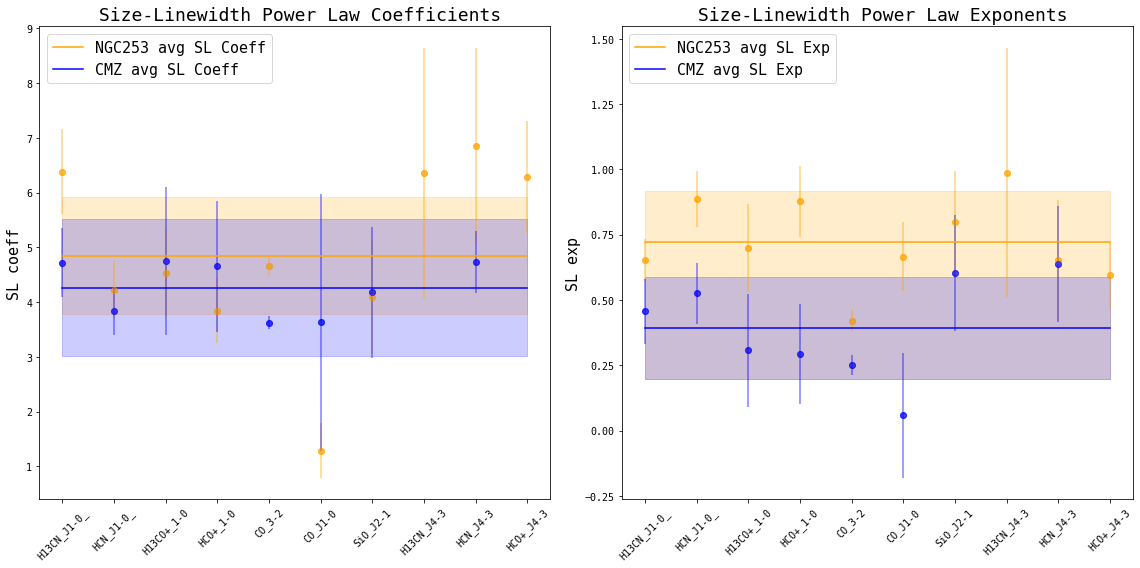

In [198]:
#
#Leaves
#
#
#Compare fits for molecules


#with open("Result Files/MCMC fit results", 'rb') as file:
#    save_name="MCMC fit results"
#    fit_results_cmz,fit_results_ngc = pickle.load(file)
    
with open("Result Files/LS fit results", 'rb') as file:
    save_name="LS fit results"
    fit_results_cmz,fit_results_ngc = pickle.load(file)

    
Line_Names = ["H13CN_J1-0_","HCN_J1-0_",'H13CO+_1-0',"HCO+_1-0","CO_3-2","CO_J1-0","SiO_J2-1","H13CN_J4-3","HCN_J4-3","HCO+_J4-3"]
CMZ_has_line=[1            ,1          ,1           ,1         ,1       ,1        ,1         ,0           ,1         ,0]#1=yess 0=no

mean_c=0
mean_e=0

fig = plt.figure(1,figsize=(16,8))
axA = pylab.subplot(1,2, 1)
axA2 = pylab.subplot(1,2, 2)


c1,c2,c3,c4=[],[],[],[]#for clarity, use these to store the values
n1,n2,n3,n4=[],[],[],[]#for clarity, use these to store the values
save_name+=" Leaves"
r=(10,20)
lmo=0
for l in range(r[0],r[1]):
    #num = len(fit_results_ngc[0])
    num = 10
    spacing =1 # /num +1
    #load the restults
    ngc_coeff,ngc_exp,ngc_coeff_err,ngc_exp_err = fit_results_ngc[0][l][0],fit_results_ngc[0][l][1],np.sqrt(fit_results_ngc[1][l][0][0]),np.sqrt(fit_results_ngc[1][l][1][1])
    cmz_coeff,cmz_exp,cmz_coeff_err,cmz_exp_err = fit_results_cmz[0][l][0],fit_results_cmz[0][l][1],np.sqrt(fit_results_cmz[1][l][0][0]),np.sqrt(fit_results_cmz[1][l][1][1])
    if CMZ_has_line[lmo]==0:
        cmz_coeff,    cmz_exp,    cmz_coeff_err ,    cmz_exp_err=np.nan,np.nan,np.nan,np.nan

    #plots exp
    axA2.scatter(spacing*l,ngc_exp,color='orange',alpha=.5)
    axA2.errorbar(spacing*l,ngc_exp, yerr= ngc_exp_err, fmt="o",capsize=0,color='orange',alpha=.5)
    axA2.scatter(spacing*l,cmz_exp,color='blue',alpha=.5)
    axA2.errorbar(spacing*l,cmz_exp, yerr= cmz_exp_err, fmt="o",capsize=0,color='blue',alpha=.5)
    #plots coeff
    axA.scatter(spacing*l,ngc_coeff,color='orange',alpha=.5)
    axA.errorbar(spacing*l,ngc_coeff, yerr= ngc_coeff_err, fmt="o",capsize=0,color='orange',alpha=.5)
    axA.scatter(spacing*l,cmz_coeff,color='blue',alpha=.5)
    axA.errorbar(spacing*l,cmz_coeff, yerr= cmz_coeff_err, fmt="o",capsize=0,color='blue',alpha=.5)
    
    if CMZ_has_line[lmo]==0:
        cmz_coeff,    cmz_exp,    cmz_coeff_err ,    cmz_exp_err=0,0,0,0 #set to zero for simplicifty
    c1.append(cmz_coeff), c2.append(cmz_exp), c3.append(cmz_coeff_err), c4.append(cmz_exp_err)
    n1.append(ngc_coeff), n2.append(ngc_exp), n3.append(ngc_coeff_err), n4.append(ngc_exp_err)
    lmo+=1
#    
#make averages
avg_cmz_coeff = np.dot(c1,CMZ_has_line)/np.sum(CMZ_has_line)#sum the actual lines that have data and then take the mean
avg_cmz_exp = np.dot(c2,CMZ_has_line)/np.sum(CMZ_has_line)#sum the actual lines that have data and then take the mean
avg_ngc_coeff = np.mean(n1)
avg_ngc_exp = np.mean(n2)
#propagate errors to mean (sum square; take square root, divide by n)
avg_cmz_coeff_err = np.sqrt(np.sum(err**2 for err in np.array(c3)*np.array(CMZ_has_line)))/np.sum(CMZ_has_line)#
avg_cmz_exp_err = np.sqrt(np.sum(err**2 for err in np.array(c4)*np.array(CMZ_has_line)))/np.sum(CMZ_has_line)#
avg_ngc_coeff_err = np.sqrt(np.sum(err**2 for err in n3))/len(Line_Names)#
avg_ngc_exp_err = np.sqrt(np.sum(err**2 for err in n4))/len(Line_Names)#


#n = range(len(fit_results_ngc))#0 to 9
n = range(r[0],r[1])
err_r = 3 #the sigma to plot
axA.plot(n,np.full(len(n),avg_ngc_coeff),color="orange",label="NGC253 avg SL Coeff")
axA.plot(n,np.full(len(n),avg_cmz_coeff),color="blue",label="CMZ avg SL Coeff")
axA2.plot(n,np.full(len(n),avg_ngc_exp),color="orange",label="NGC253 avg SL Exp")
axA2.plot(n,np.full(len(n),avg_cmz_exp),color="blue",label="CMZ avg SL Exp")

axA.fill_between(n,np.full(len(n),avg_ngc_coeff+err_r*avg_ngc_coeff_err),np.full(len(n),avg_ngc_coeff-er_r*avg_ngc_coeff_err),color="orange",alpha=.2)
axA.fill_between(n,np.full(len(n),avg_cmz_coeff+err_r*avg_cmz_coeff_err),np.full(len(n),avg_cmz_coeff-er_r*avg_cmz_coeff_err),color="blue",alpha=.2)
axA2.fill_between(n,np.full(len(n),avg_ngc_exp+err_r*avg_ngc_exp_err),np.full(len(n),avg_cmz_exp-er_r*avg_ngc_exp_err),color="orange",alpha=.2)
axA2.fill_between(n,np.full(len(n),avg_cmz_exp+err_r*avg_cmz_exp_err),np.full(len(n),avg_cmz_exp-er_r*avg_cmz_exp_err),color="blue",alpha=.2)
print("average parameters for",save_name,":")
print("a_cmz =",avg_cmz_coeff,"+-",avg_cmz_coeff_err)
print("b_cmz =",avg_cmz_exp,"+-",avg_cmz_exp_err)
print("a_ngc =",avg_ngc_coeff,"+-",avg_ngc_coeff_err)
print("b_ngc =",avg_ngc_exp,"+-",avg_ngc_exp_err)

#set line labels
axA.set_xticks(n)
axA.set_xticklabels(Line_Names, rotation=45)
axA2.set_xticks(n)
axA2.set_xticklabels(Line_Names, rotation=45)


axA.set_ylabel('SL coeff',fontsize=15)
axA2.set_ylabel('SL exp',fontsize=15)


axA.set_title(" Size-Linewidth Power Law Coefficients", fontsize=18)
axA2.set_title(" Size-Linewidth Power Law Exponents", fontsize=18)

axA.legend(loc='upper left',fontsize=15,)
axA2.legend(loc='upper left',fontsize=15,)


plt.tight_layout()  # avoids label cutoff


fig.savefig(bbox_inches='tight',fname=save_name+" all lines.png")

pylab.show()

In [ ]:
#
#Leaves
#
#
#Compare fits for molecules


#with open("Result Files/MCMC fit results", 'rb') as file:
#    save_name="MCMC fit results"
#    fit_results_cmz,fit_results_ngc = pickle.load(file)
    
with open("Result Files/MCMC fit results", 'rb') as file:
    save_name="MCMC fit results"
    fit_results_cmz,fit_results_ngc = pickle.load(file)

    
Line_Names = ["H13CN_J1-0_","HCN_J1-0_",'H13CO+_1-0',"HCO+_1-0","CO_3-2","CO_J1-0","SiO_J2-1","H13CN_J4-3","HCN_J4-3","HCO+_J4-3"]
CMZ_has_line=[1            ,1          ,1           ,1         ,1       ,1        ,1         ,0           ,1         ,0]#1=yess 0=no

mean_c=0
mean_e=0

fig = plt.figure(1,figsize=(16,8))
axA = pylab.subplot(1,2, 1)
axA2 = pylab.subplot(1,2, 2)


c1,c2,c3,c4=[],[],[],[]#for clarity, use these to store the values
n1,n2,n3,n4=[],[],[],[]#for clarity, use these to store the values
save_name+=" Leaves"
r=(10,20)
lmo=0
for l in range(r[0],r[1]):
    #num = len(fit_results_ngc[0])
    num = 10
    spacing =1 # /num +1
    #load the restults
    ngc_coeff,ngc_exp,ngc_coeff_err,ngc_exp_err = fit_results_ngc[0][l][0],fit_results_ngc[0][l][1],np.sqrt(fit_results_ngc[1][l][0][0]),np.sqrt(fit_results_ngc[1][l][1][1])
    cmz_coeff,cmz_exp,cmz_coeff_err,cmz_exp_err = fit_results_cmz[0][l][0],fit_results_cmz[0][l][1],np.sqrt(fit_results_cmz[1][l][0][0]),np.sqrt(fit_results_cmz[1][l][1][1])
    if CMZ_has_line[lmo]==0:
        cmz_coeff,    cmz_exp,    cmz_coeff_err ,    cmz_exp_err=np.nan,np.nan,np.nan,np.nan

    #plots exp
    axA2.scatter(spacing*l,ngc_exp,color='orange',alpha=.5)
    axA2.errorbar(spacing*l,ngc_exp, yerr= ngc_exp_err, fmt="o",capsize=0,color='orange',alpha=.5)
    axA2.scatter(spacing*l,cmz_exp,color='blue',alpha=.5)
    axA2.errorbar(spacing*l,cmz_exp, yerr= cmz_exp_err, fmt="o",capsize=0,color='blue',alpha=.5)
    #plots coeff
    axA.scatter(spacing*l,ngc_coeff,color='orange',alpha=.5)
    axA.errorbar(spacing*l,ngc_coeff, yerr= ngc_coeff_err, fmt="o",capsize=0,color='orange',alpha=.5)
    axA.scatter(spacing*l,cmz_coeff,color='blue',alpha=.5)
    axA.errorbar(spacing*l,cmz_coeff, yerr= cmz_coeff_err, fmt="o",capsize=0,color='blue',alpha=.5)
    
    if CMZ_has_line[lmo]==0:
        cmz_coeff,    cmz_exp,    cmz_coeff_err ,    cmz_exp_err=0,0,0,0 #set to zero for simplicifty
    c1.append(cmz_coeff), c2.append(cmz_exp), c3.append(cmz_coeff_err), c4.append(cmz_exp_err)
    n1.append(ngc_coeff), n2.append(ngc_exp), n3.append(ngc_coeff_err), n4.append(ngc_exp_err)
    lmo+=1
#    
#make averages
avg_cmz_coeff = np.dot(c1,CMZ_has_line)/np.sum(CMZ_has_line)#sum the actual lines that have data and then take the mean
avg_cmz_exp = np.dot(c2,CMZ_has_line)/np.sum(CMZ_has_line)#sum the actual lines that have data and then take the mean
avg_ngc_coeff = np.mean(n1)
avg_ngc_exp = np.mean(n2)
#propagate errors to mean (sum square; take square root, divide by n)
avg_cmz_coeff_err = np.sqrt(np.sum(err**2 for err in np.array(c3)*np.array(CMZ_has_line)))/np.sum(CMZ_has_line)#
avg_cmz_exp_err = np.sqrt(np.sum(err**2 for err in np.array(c4)*np.array(CMZ_has_line)))/np.sum(CMZ_has_line)#
avg_ngc_coeff_err = np.sqrt(np.sum(err**2 for err in n3))/len(Line_Names)#
avg_ngc_exp_err = np.sqrt(np.sum(err**2 for err in n4))/len(Line_Names)#


#n = range(len(fit_results_ngc))#0 to 9
n = range(r[0],r[1])
err_r = 3 #the sigma to plot
axA.plot(n,np.full(len(n),avg_ngc_coeff),color="orange",label="NGC253 avg SL Coeff")
axA.plot(n,np.full(len(n),avg_cmz_coeff),color="blue",label="CMZ avg SL Coeff")
axA2.plot(n,np.full(len(n),avg_ngc_exp),color="orange",label="NGC253 avg SL Exp")
axA2.plot(n,np.full(len(n),avg_cmz_exp),color="blue",label="CMZ avg SL Exp")

axA.fill_between(n,np.full(len(n),avg_ngc_coeff+err_r*avg_ngc_coeff_err),np.full(len(n),avg_ngc_coeff-er_r*avg_ngc_coeff_err),color="orange",alpha=.2)
axA.fill_between(n,np.full(len(n),avg_cmz_coeff+err_r*avg_cmz_coeff_err),np.full(len(n),avg_cmz_coeff-er_r*avg_cmz_coeff_err),color="blue",alpha=.2)
axA2.fill_between(n,np.full(len(n),avg_ngc_exp+err_r*avg_ngc_exp_err),np.full(len(n),avg_cmz_exp-er_r*avg_ngc_exp_err),color="orange",alpha=.2)
axA2.fill_between(n,np.full(len(n),avg_cmz_exp+err_r*avg_cmz_exp_err),np.full(len(n),avg_cmz_exp-er_r*avg_cmz_exp_err),color="blue",alpha=.2)
print("average parameters for",save_name,":")
print("a_cmz =",avg_cmz_coeff,"+-",avg_cmz_coeff_err)
print("b_cmz =",avg_cmz_exp,"+-",avg_cmz_exp_err)
print("a_ngc =",avg_ngc_coeff,"+-",avg_ngc_coeff_err)
print("b_ngc =",avg_ngc_exp,"+-",avg_ngc_exp_err)

#set line labels
axA.set_xticks(n)
axA.set_xticklabels(Line_Names, rotation=45)
axA2.set_xticks(n)
axA2.set_xticklabels(Line_Names, rotation=45)


axA.set_ylabel('SL coeff',fontsize=15)
axA2.set_ylabel('SL exp',fontsize=15)


axA.set_title(" Size-Linewidth Power Law Coefficients", fontsize=18)
axA2.set_title(" Size-Linewidth Power Law Exponents", fontsize=18)

axA.legend(loc='upper left',fontsize=15,)
axA2.legend(loc='upper left',fontsize=15,)


plt.tight_layout()  # avoids label cutoff


fig.savefig(bbox_inches='tight',fname=save_name+" all lines.png")

pylab.show()